#**Sentiment Analysis and Prescription of Medicines using customer review** 
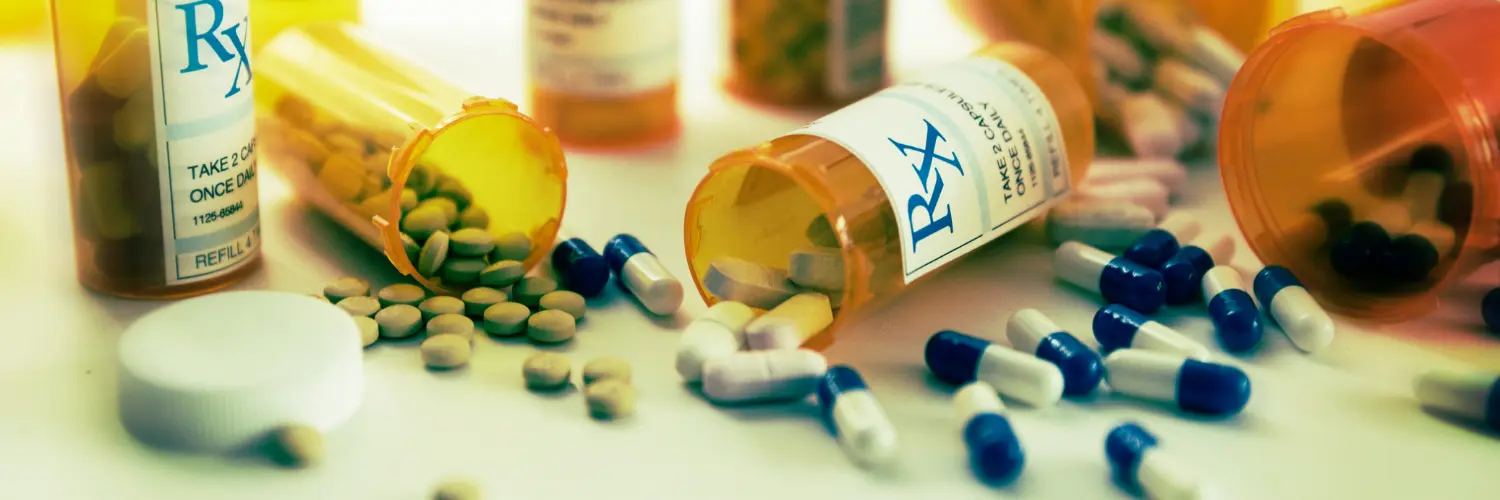


About Dataset:

The dataset contains drug reviews, the rating given out of 10, the drug that the person is reviewing, the condition it is treating and how useful the review was. These were scraped from online. Dataset contains over 200000 patients review about medicine. This dataset is mainly used for reasearch and project purpose.

The dataset was originally published on the UCI Machine Learning repository. Citation:

Felix Gräßer, Surya Kallumadi, Hagen Malberg, and Sebastian Zaunseder. 2018. Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning. In Proceedings of the 2018 International Conference on Digital Health (DH '18). ACM, New York, NY, USA, 121-125.

The Objective of this Project is to Analyse the Dataset, plot the inferences with good visualizations and answer **some Questions** to extract information from the Dataset.

1) What is the most popular medicine?

2) What are the most suffered conditions?

3) Which medicine has the best review?

4) How many medicines do we have?

5) The number of medicines per condition?

6) Number of patients that searched on a particular medicine?

7) How genuine is the review? (Using sentiment analysis)

8) How many reviews are positive,negative,neutral?

9) Correlation between rating and review and users who found the review useful?

10) Can you predict the rating using the review?

11) Distribution of rating?

12) Amount of review made per year and per month?

13) Which condition has the most review on drugs?

Also analyse the sentiment of the patients, according to their reviews and various other features like the condition they are suffering from, the rating of the drug used, Date of the usage, and others.

After performing sentiment analysis buld a system that will recommend the medicines based on condition.







In [1]:
# Load EDA
import pandas as pd
import numpy as np
# Load Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
plt.style.use('fivethirtyeight')
%matplotlib inline

# **Loading** **Dataset**

In [2]:
df_Train = pd.read_csv('https://raw.githubusercontent.com/AbhinayHinge/Medicine-recommendation/main/Train_Data/drugsComTrain_raw.csv')
df_Train.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [3]:
df_Test=pd.read_csv('https://raw.githubusercontent.com/AbhinayHinge/Medicine-recommendation/main/Test_Data/drugsComTest_raw.csv')
df_Test.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3


In [4]:
# Shape of training dataset
print("Shape of Training Dataset is:",df_Train.shape)

Shape of Training Dataset is: (161297, 7)


In [5]:
# Shape of testing dataset 
print("Shape of Testing Dataset is:",df_Test.shape)

Shape of Testing Dataset is: (53766, 7)


In [6]:
# From the above two ouputs we can see that both the dataset contains same columns, we can combine them for better analysis
df = pd.concat([df_Train, df_Test])
print("Shape of dataset after combining both train & test:", df.shape)
df.head(10)

Shape of dataset after combining both train & test: (215063, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [7]:
df.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [8]:
df.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

# **Descriptive Statistics**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,215063.0,116039.364814,67007.913366,0.0,58115.5,115867.0,173963.5,232291.0
rating,215063.0,6.990008,3.275554,1.0,5.0,8.0,10.0,10.0
usefulCount,215063.0,28.001004,36.346069,0.0,6.0,16.0,36.0,1291.0


In [11]:
# summarization of Categorical data
df[['drugName','condition','review']].describe(include = 'object')

,drugName,condition,review
count,215063,213869,215063
unique,3671,916,128478
top,Levonorgestrel,Birth Control,"""Good"""
freq,4930,38436,39


In [12]:
# lets Explore Some of the Important Columns in the dataset

print("Number of Unique Medicines present in the Dataset :", df['drugName'].nunique())
print("Number of Unique Medical Conditions present in the Dataset :", df['condition'].nunique())

print("\nThe Time Period of Collecting the Data")
print("Starting Date :", df['date'].min())
print("Ending Date :", df['date'].max())

Number of Unique Medicines present in the Dataset : 3671
Number of Unique Medical Conditions present in the Dataset : 916

The Time Period of Collecting the Data
Starting Date : 1-Apr-08
Ending Date : 9-Sep-17


There are 3671 unique medicines with 916 unique conditions

In [13]:
df.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [14]:
df.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

There are 1194 NULL values or NAN values present in 'condition' Column

This implies that most people don't know their condition by name or privacy



# EDA and Data Visualization

*1) What is the most popular medicine?*

In [15]:
# Top 20 Drugs (Most Popular)
df['drugName'].value_counts().nlargest(20)

Levonorgestrel                        4930
Etonogestrel                          4421
Ethinyl estradiol / norethindrone     3753
Nexplanon                             2892
Ethinyl estradiol / norgestimate      2790
Ethinyl estradiol / levonorgestrel    2503
Phentermine                           2085
Sertraline                            1868
Escitalopram                          1747
Mirena                                1673
Implanon                              1506
Gabapentin                            1415
Bupropion                             1369
Miconazole                            1344
Venlafaxine                           1338
Medroxyprogesterone                   1308
Citalopram                            1308
Duloxetine                            1256
Lexapro                               1250
Bupropion / naltrexone                1249
Name: drugName, dtype: int64

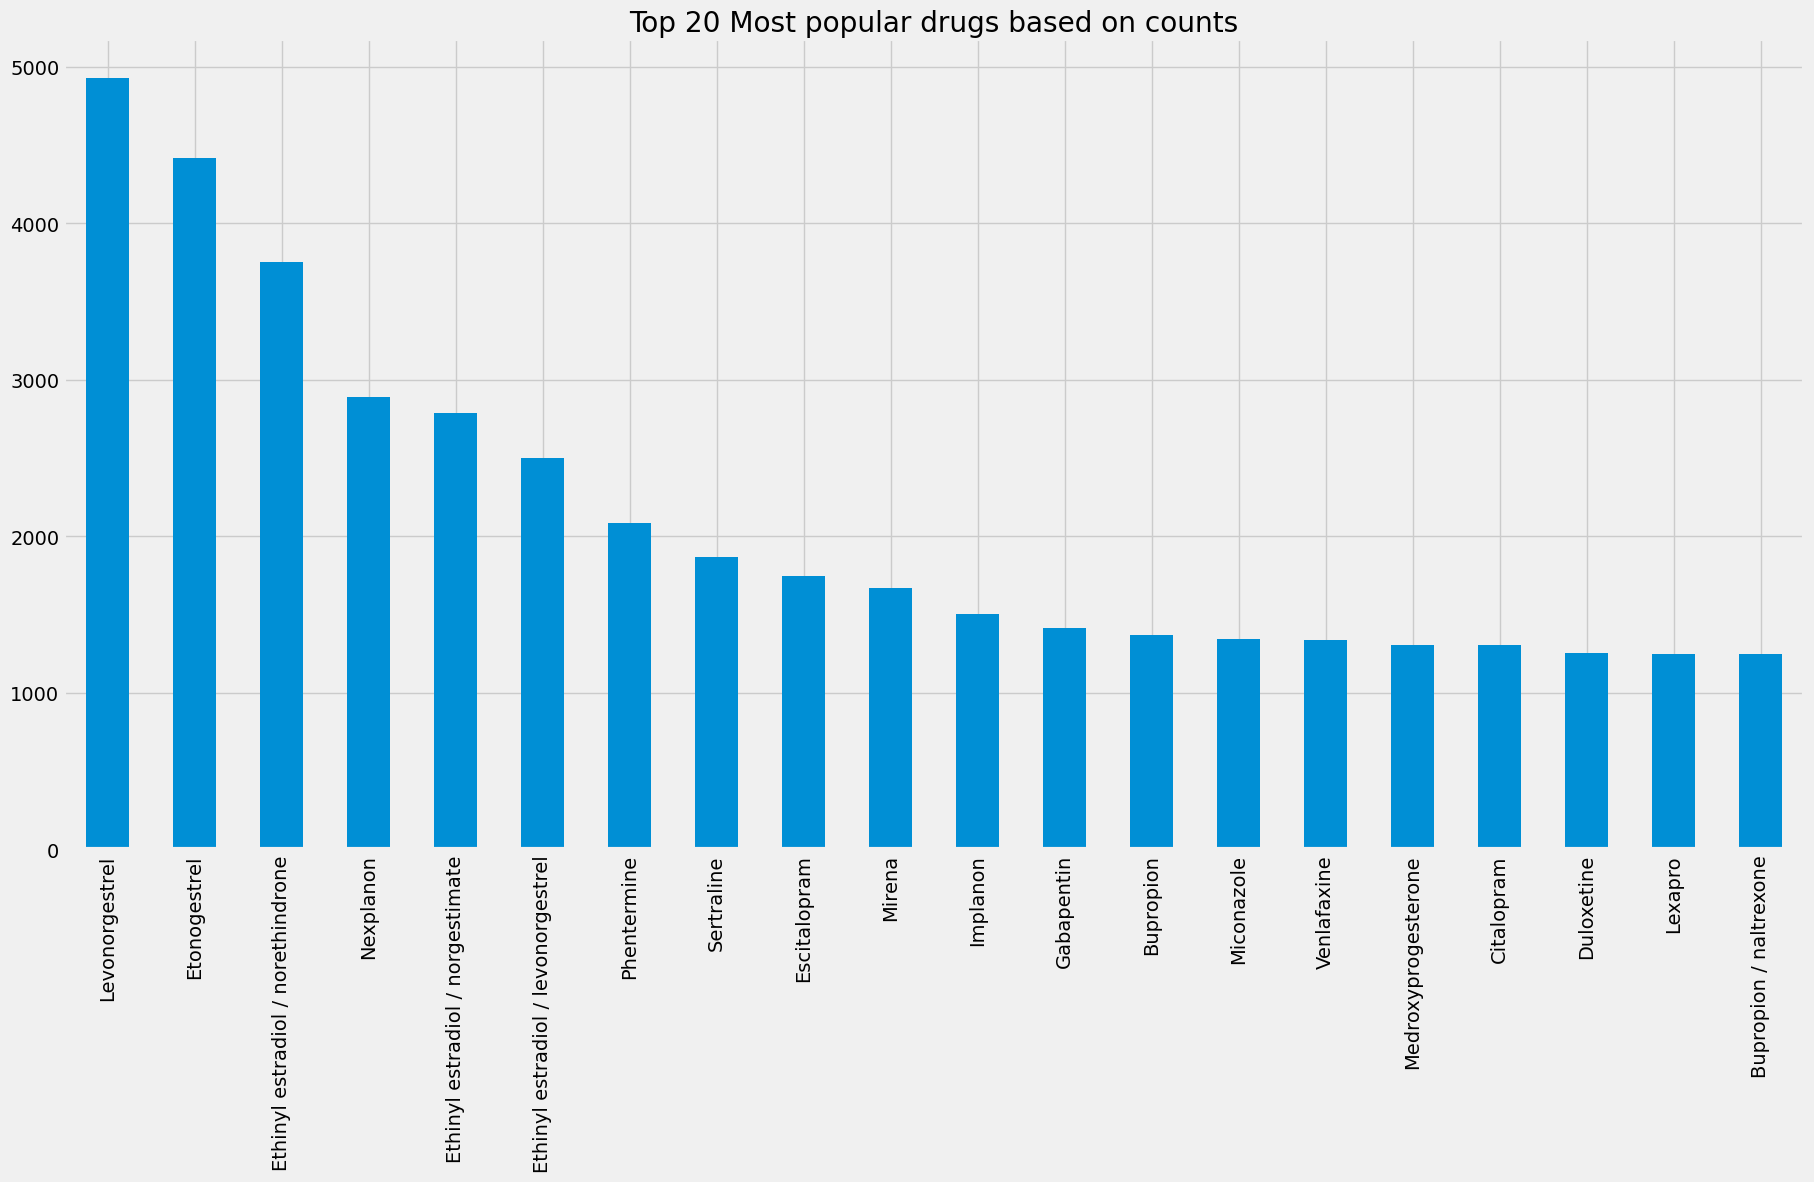

In [16]:
# Top 20 Medicines (Most Popular)
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

Most popular Medicine is Levonorgestrel which is used to prevent pregnancy.

Most of the common top Medicines are harmonal drugs.

## ***Which medicine has the best review?***

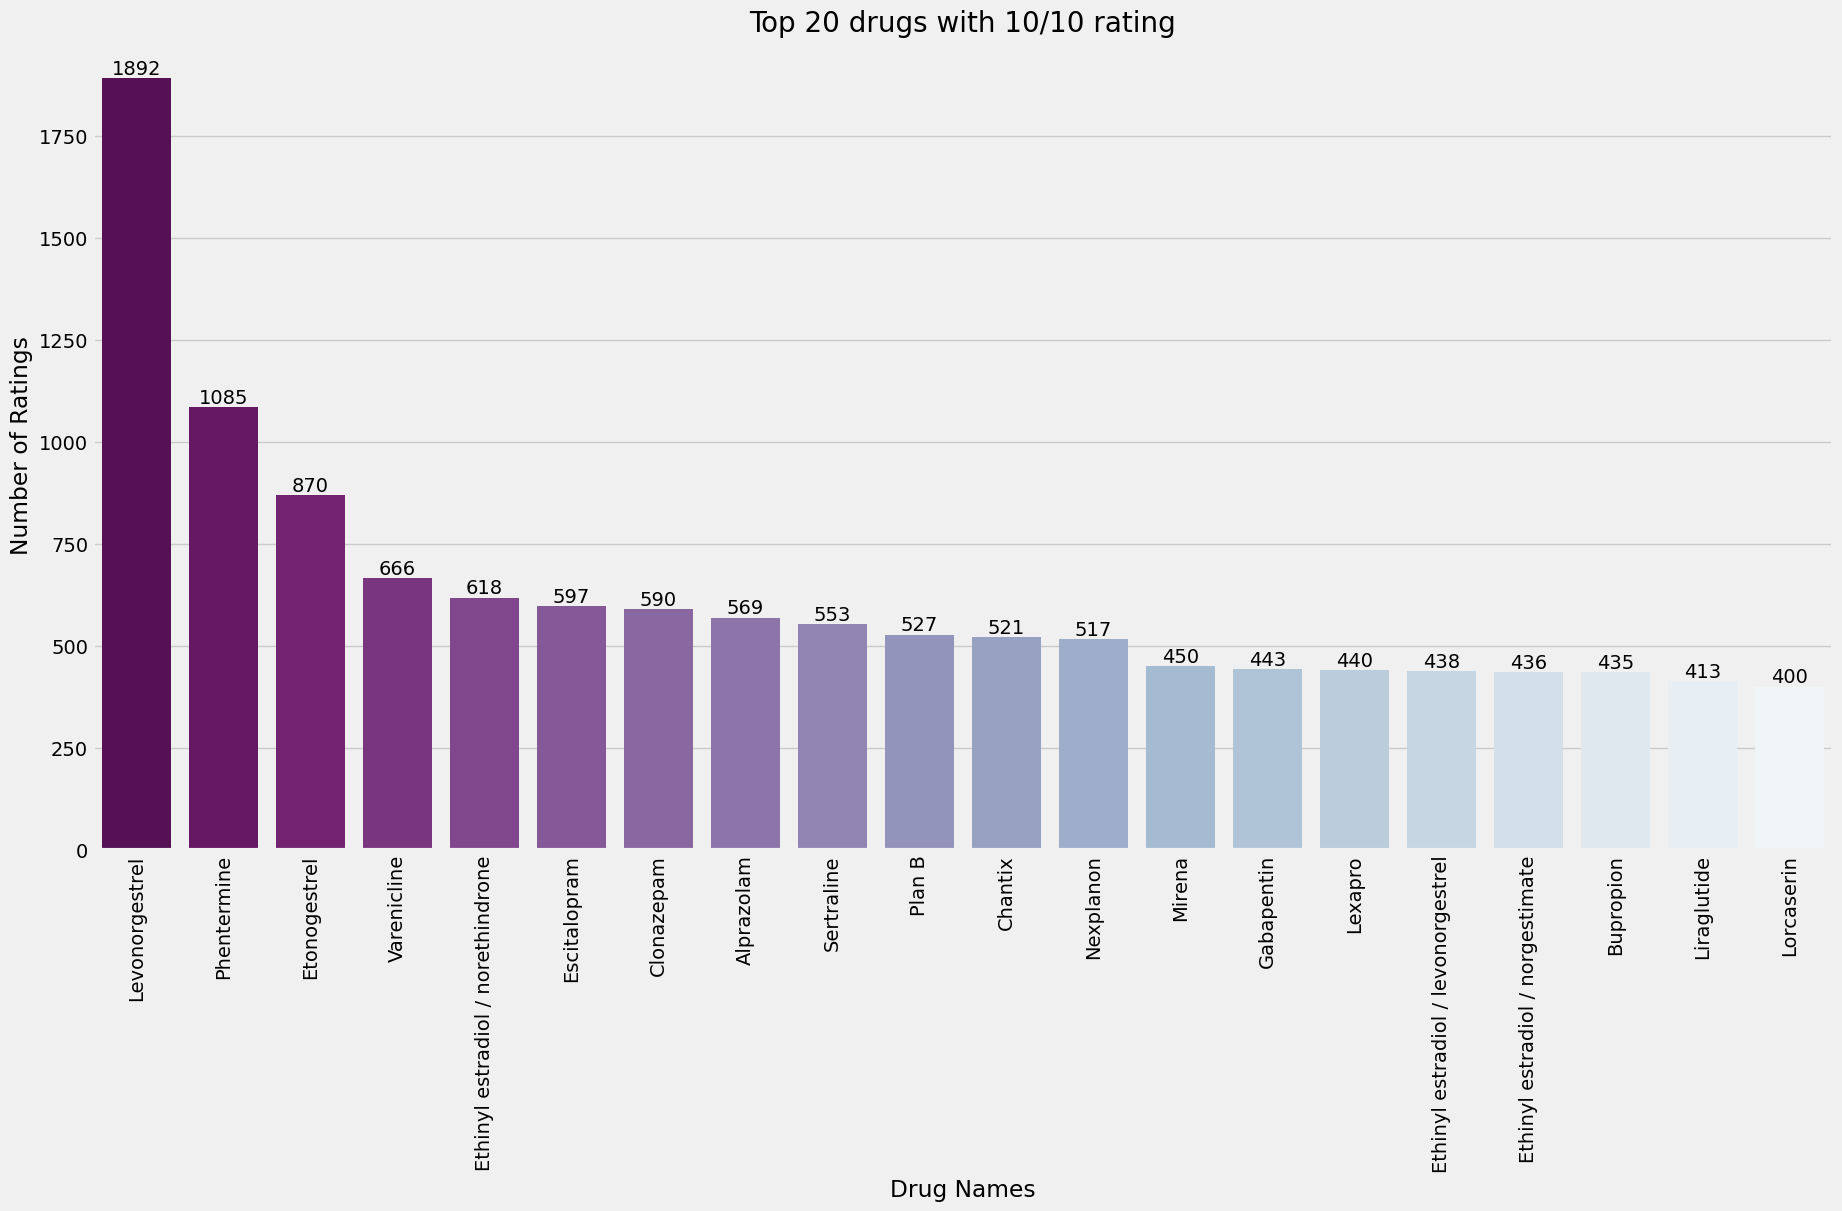

In [17]:
# Top 20 Drugs (Most Popular based on ratings)
plt.figure(figsize=(20,10))
rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'BuPu_r')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 10/10 rating', fontsize=20)
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

Levonorgestrel, Phentemine, Etonogestrel are the Durgs with the Heighest Ratings

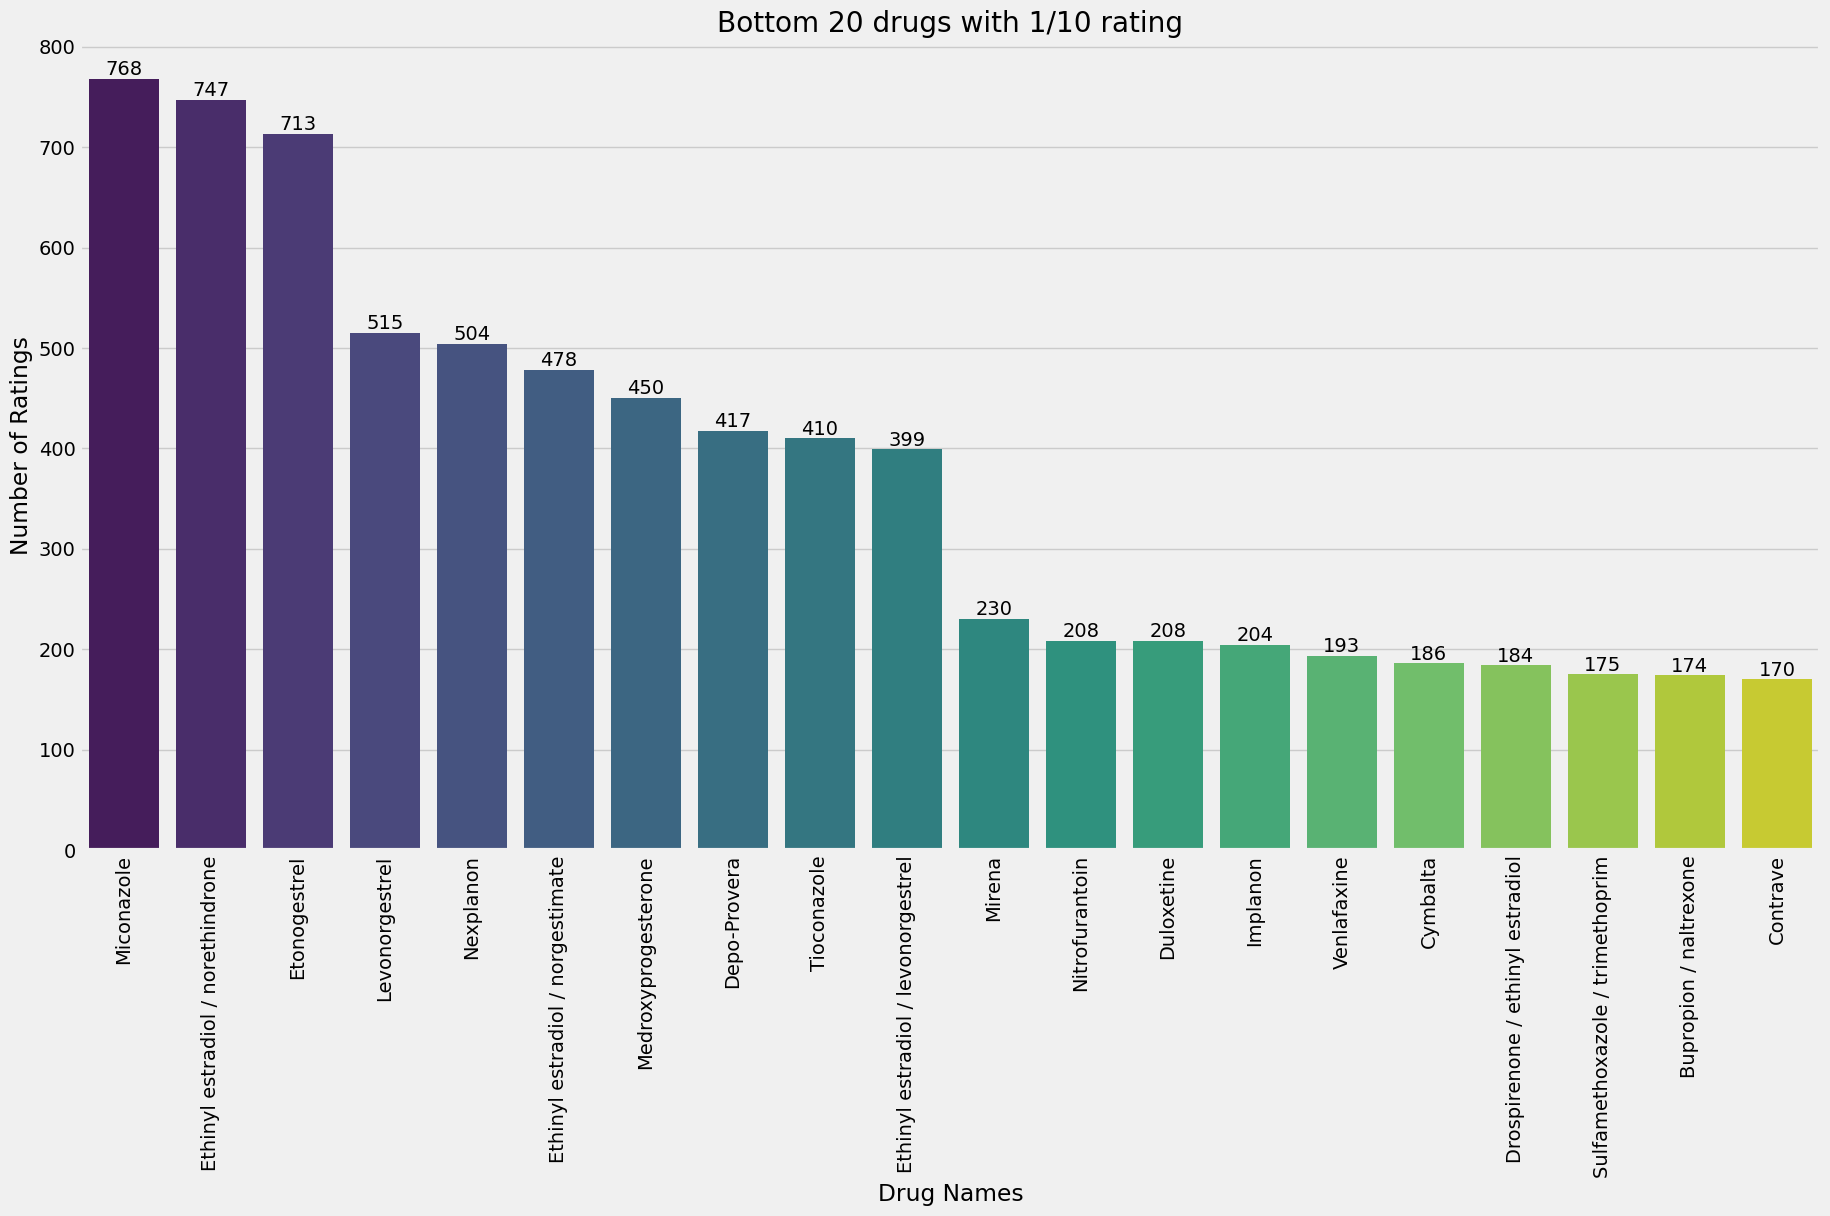

In [18]:
# Bottom 20 Drugs (Least Popular)
plt.figure(figsize=(20,10))
rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'viridis')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Bottom 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

Norethindrone, Miconzole are the Drugs with the Least ratings given by patients

**Top 10 medicines with best and worst rating**

When doing this analysis for all the medicines, there is a factor which affect the results: the number of reviews of a medicine. i.e. if we want to compute the medicine with best rating, the medicine which in only 1 review was given a 10 rating would be in TOP 1. For this reason, we only consider medicines with a significant number of reviews. A significant number of reviews is when the number of reviews for a medicine is above the 75% of the number of reviews distribution per drug.

Significant number of reviews: More than 30.0 reviews


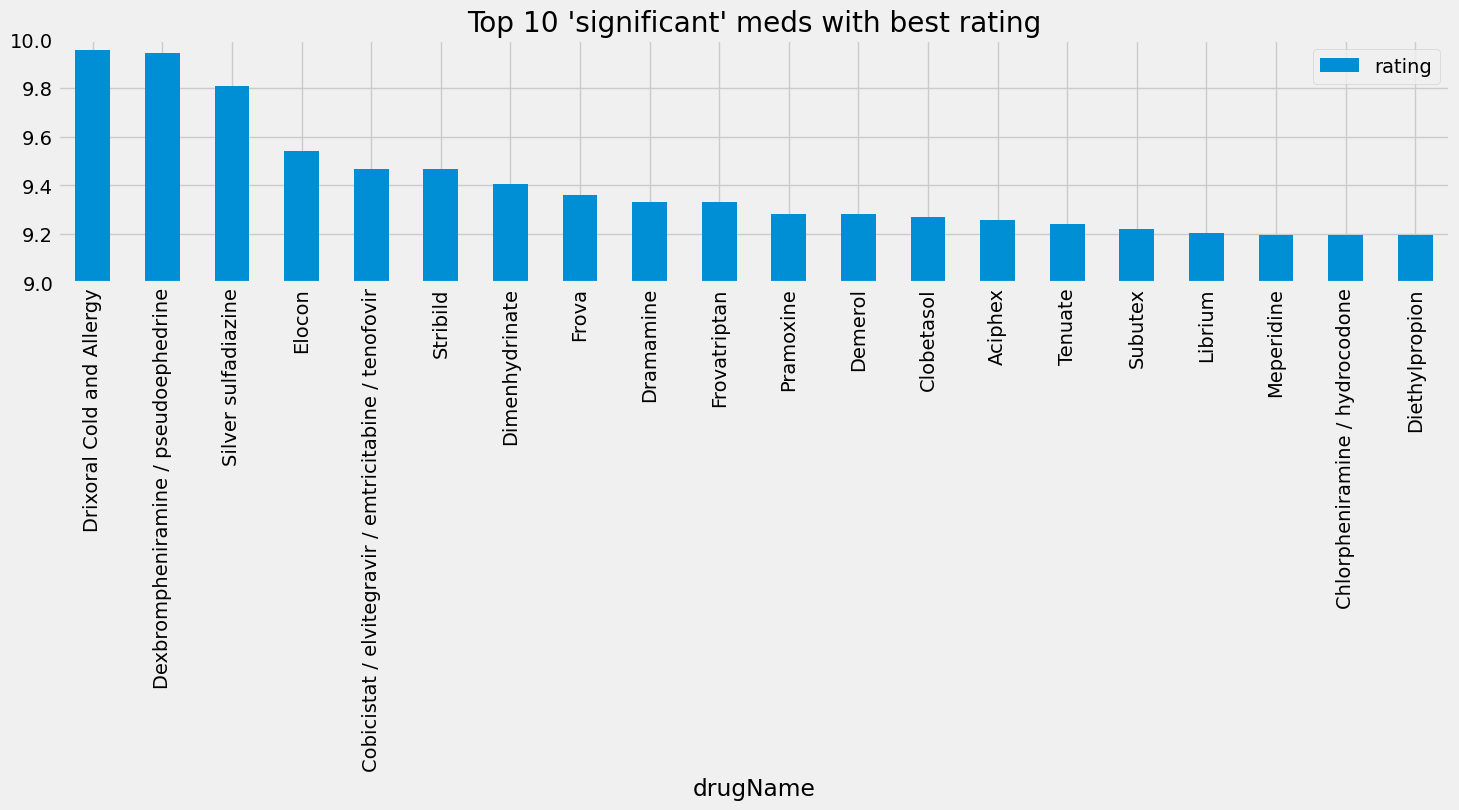

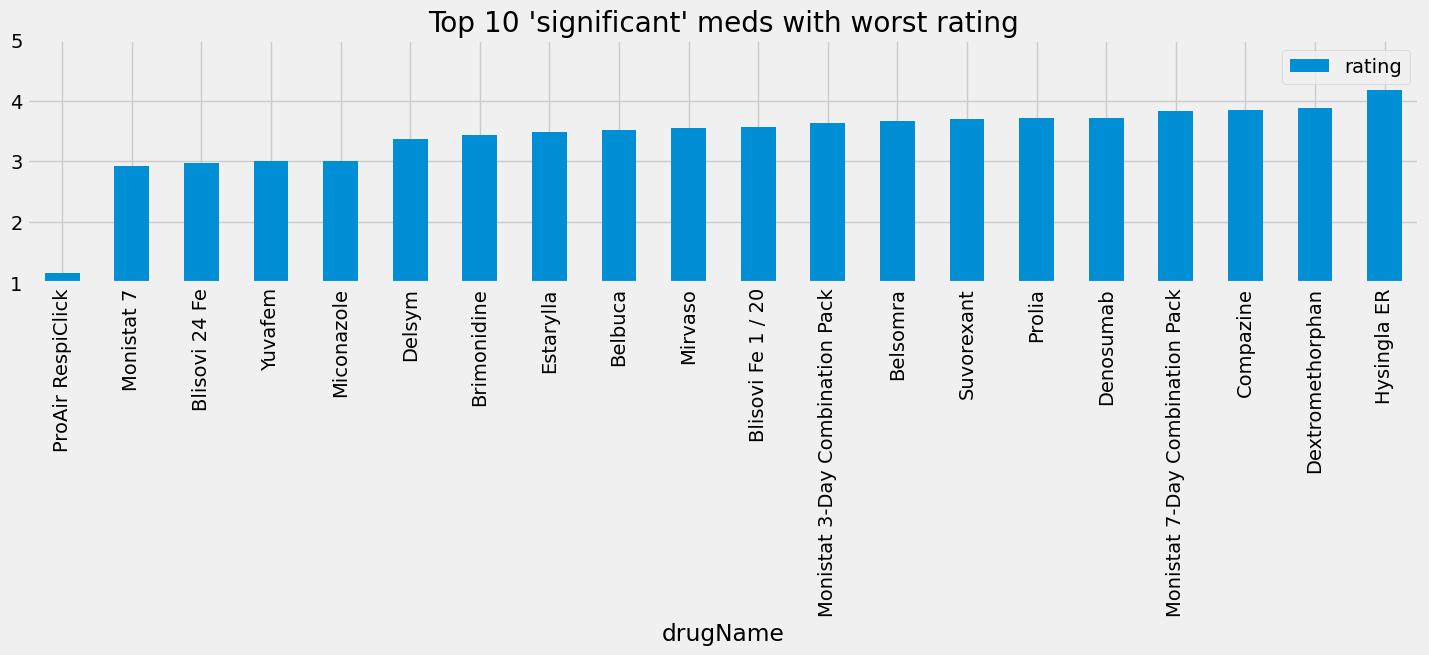

In [19]:
# Number of reviews per drug
reviews_per_med = df.groupby(["drugName"]).agg({
    "uniqueID": pd.Series.nunique
})
reviews_per_med.describe()
med_rating = df.groupby('drugName').agg({
    'rating': np.mean,
    'uniqueID': pd.Series.nunique
})

print("Significant number of reviews: More than", reviews_per_med.quantile(q=0.75).values[0], "reviews")

# We only use the drugs which number of reviews is higher than a threshold
med_rating = med_rating[med_rating['uniqueID'] > int(reviews_per_med.quantile(q=0.75))]

# Top 10
top_med_rating = med_rating.nlargest(20, 'rating')
plot = top_med_rating.plot(y='rating', kind='bar', figsize = (16, 3))
dummy = plt.title("Top 10 'significant' meds with best rating") # Assigned to variable to prevent output
dummy = plt.ylim(9, 10) # Assigned to variable to prevent output

# Bottom 10
bottom_med_rating = med_rating.nsmallest(20, 'rating')
plot = bottom_med_rating.plot(y='rating', kind='bar', figsize = (16, 3))
dummy = plt.title("Top 10 'significant' meds with worst rating") # Assigned to variable to prevent output
dummy = plt.ylim(1, 5) # Assigned to variable to prevent output

These are the signinficant values i.e. overall average top 10 rated medicines and bottom 10 rated medicines.

In [20]:
# lets check the Number and Name of the Drugs with 0 Useful Count in Details
print("Analysis on Useless Drugs")
print("----------------------------")
print("The Number of Drugs with No Useful Count :", df[df['usefulCount'] == 0].count()[0])

# Lets Check the Average Rating of the Drugs with No Useful Count
print("Average Rating of Drugs with No Useful Count : {0:.2f}".format(df[df['usefulCount'] == 0]['rating'].mean()))
print("\nName and Condition of Useless Drugs: \n\n", 
    df[df['usefulCount'] == 0][['drugName','condition']].head(4).reset_index(drop = True))

print("\nAnalysis on Useful Drugs")
print("----------------------------")
print("The Number of Drugs with Greater than 1000 Useful Counts :", df[df['usefulCount'] > 1000].count()[0])
print("Average Rating of Drugs with 1000+ Useful Counts :", df[df['usefulCount'] > 1000]['rating'].mean())
print("\nName and Condition of Useful Drugs: \n\n", 
    df[df['usefulCount'] > 1000][['drugName','condition']].reset_index(drop = True))

Analysis on Useless Drugs
----------------------------
The Number of Drugs with No Useful Count : 8402
Average Rating of Drugs with No Useful Count : 5.82

Name and Condition of Useless Drugs: 

                   drugName                condition
0             Trimethoprim  Urinary Tract Infection
1                 MoviPrep        Bowel Preparation
2  Ledipasvir / sofosbuvir              Hepatitis C
3                 NuvaRing            Birth Control

Analysis on Useful Drugs
----------------------------
The Number of Drugs with Greater than 1000 Useful Counts : 4
Average Rating of Drugs with 1000+ Useful Counts : 10.0

Name and Condition of Useful Drugs: 

          drugName      condition
0          Mirena  Birth Control
1      Sertraline     Depression
2  Levonorgestrel  Birth Control
3          Zoloft     Depression


### ***What are the most suffered conditions?***

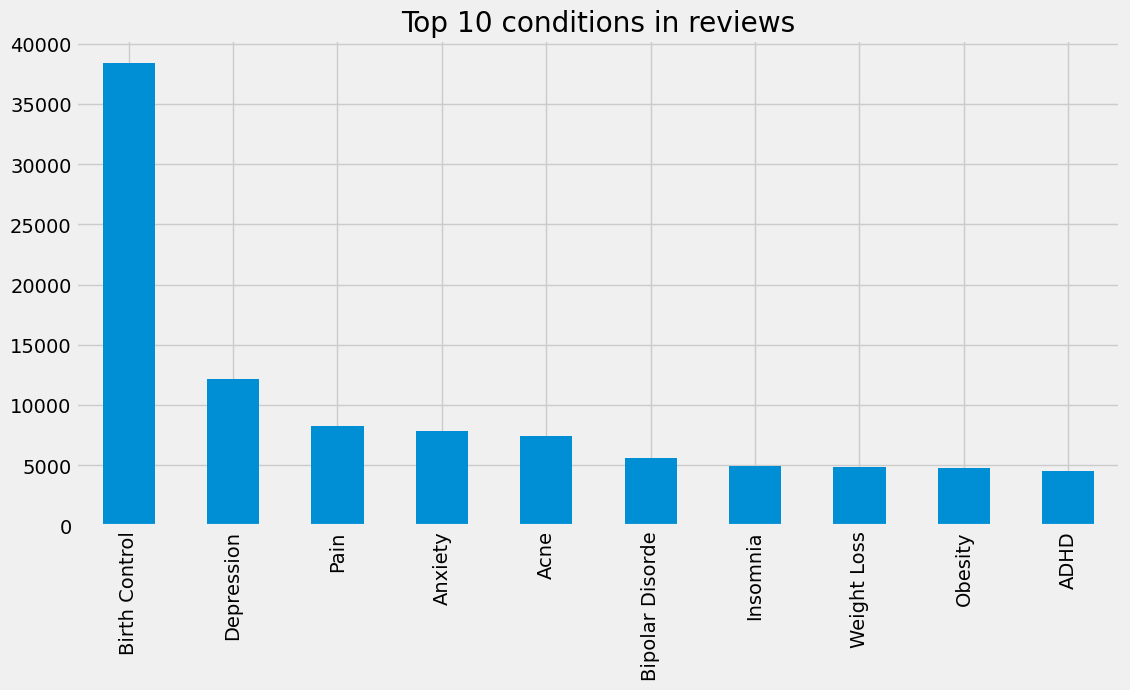

In [21]:
# Top 10 most suffered condition by patients
plot = df.condition.value_counts().nlargest(10).plot(kind='bar', title="Top 10 conditions in reviews", figsize=(12,6))

Birth control, depression, pain and anxiety are the most suffered conditions

Analyzing Pairs (Drug, Condition) with best and worst ratings

We concluded that the rating of a medicine, is strongly related to the condition that the person who reviewed was suffering. We are going to compute the top 10 best and worst rating of reviews for (Drug, condition) pairs.

Number of pairs (Drug, Condition): 9446
Significant number of reviews: More than 10.0 reviews


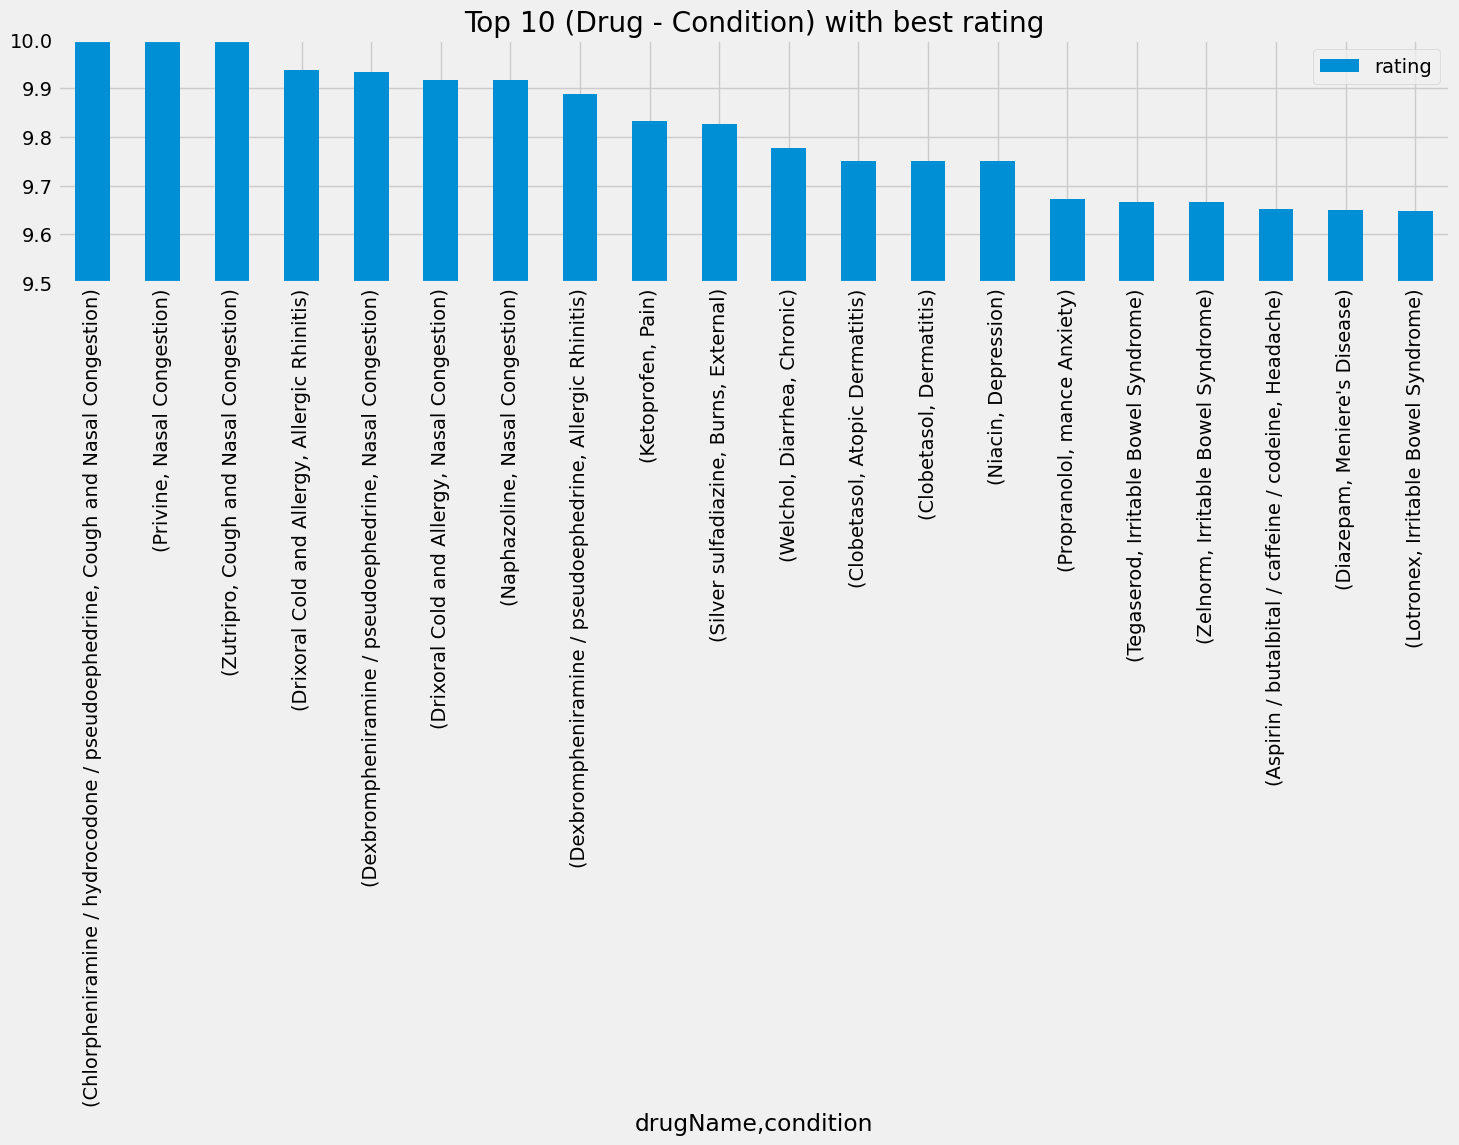

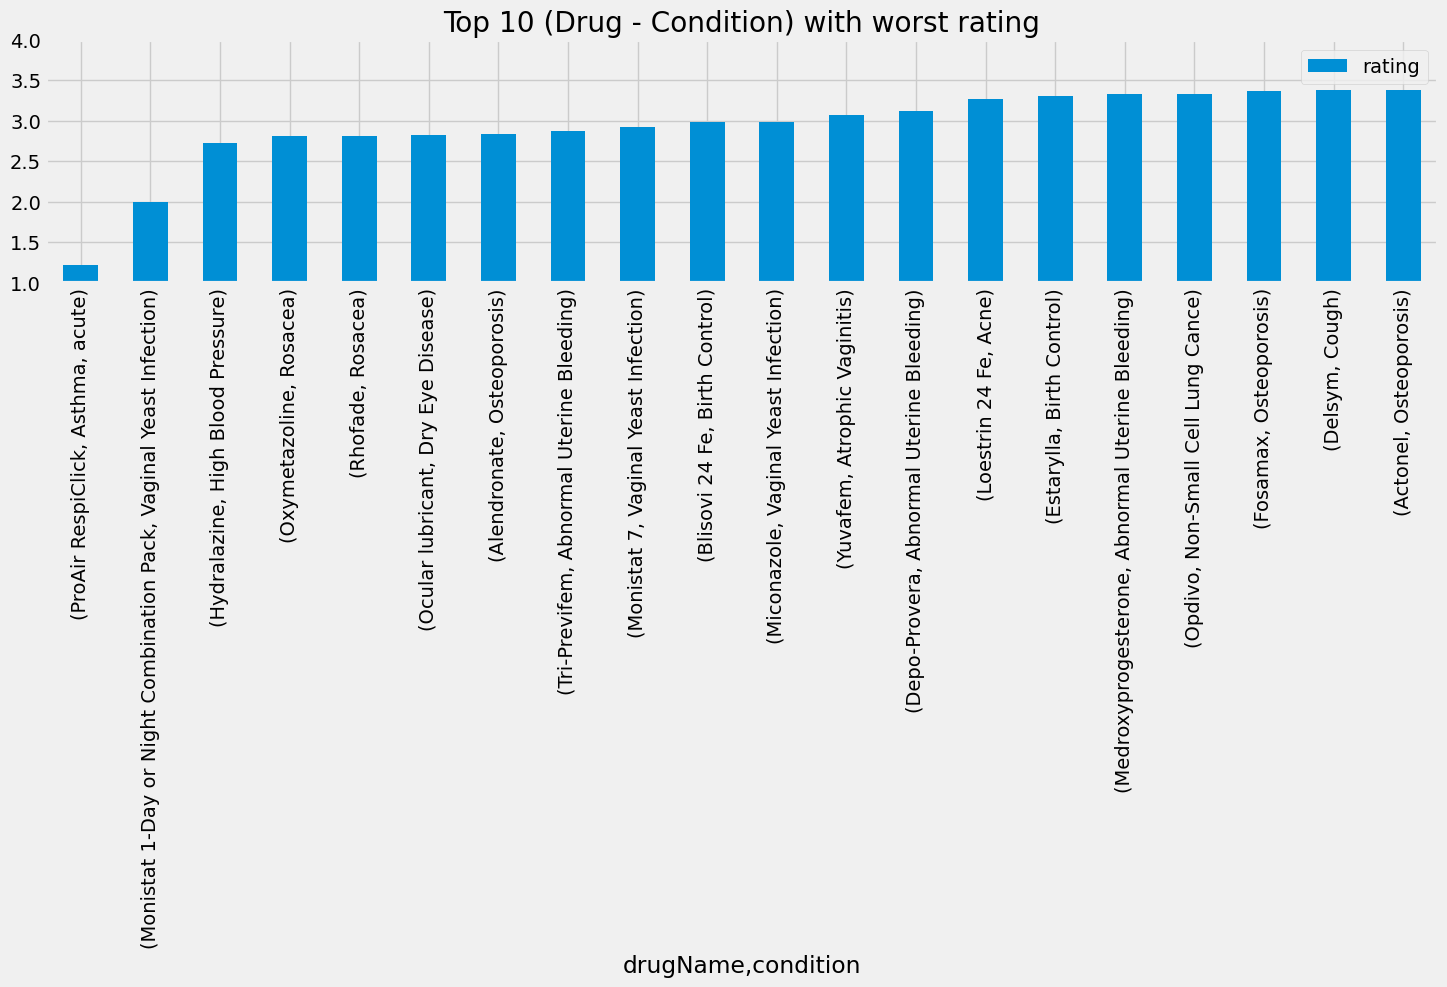

In [22]:
drugs_condition_rating = df.groupby(['drugName', 'condition']).agg({
    'rating': np.mean,
    'uniqueID': pd.Series.nunique
})

print("Number of pairs (Drug, Condition):", len(drugs_condition_rating))

print("Significant number of reviews: More than", drugs_condition_rating['uniqueID'].quantile(q=0.75), "reviews")

drugs_condition_rating = drugs_condition_rating[drugs_condition_rating['uniqueID'] > int(drugs_condition_rating['uniqueID'].quantile(q=0.75))]
# drugs_condition_rating.sort_values('rating', ascending=False)
top_drugs_condition_rating = drugs_condition_rating.nlargest(20, 'rating')
plot = top_drugs_condition_rating.plot(y='rating', kind='bar', figsize = (16, 3))
dummy = plt.title("Top 10 (Drug - Condition) with best rating") # Assigned to variable to prevent output
dummy = plt.ylim(9.5, 10) # Assigned to variable to prevent output

bottom_drugs_condition_rating = drugs_condition_rating.nsmallest(20, 'rating')
plot = bottom_drugs_condition_rating.plot(y='rating', kind='bar', figsize = (16, 3))
dummy = plt.title("Top 10 (Drug - Condition) with worst rating") # Assigned to variable to prevent output
dummy = plt.ylim(1, 4) # Assigned to variable to prevent output

This graph was calculated by grouping drug and condition column so that we can get overall review of dataset about the drug and condition.

This gives us an idea about overall dataset like which are the drugs and conditions occurred mostly

## ***How many unique medicines and conditions do we have?***

In [23]:
# lets Explore Some of the Important Columns in the dataset

print("Number of Unique Medicines present in the Dataset :", df['drugName'].nunique())
print("Number of Unique Medical Conditions present in the Dataset :", df['condition'].nunique())

Number of Unique Medicines present in the Dataset : 3671
Number of Unique Medical Conditions present in the Dataset : 916


## ***The number of medicines per condition?***

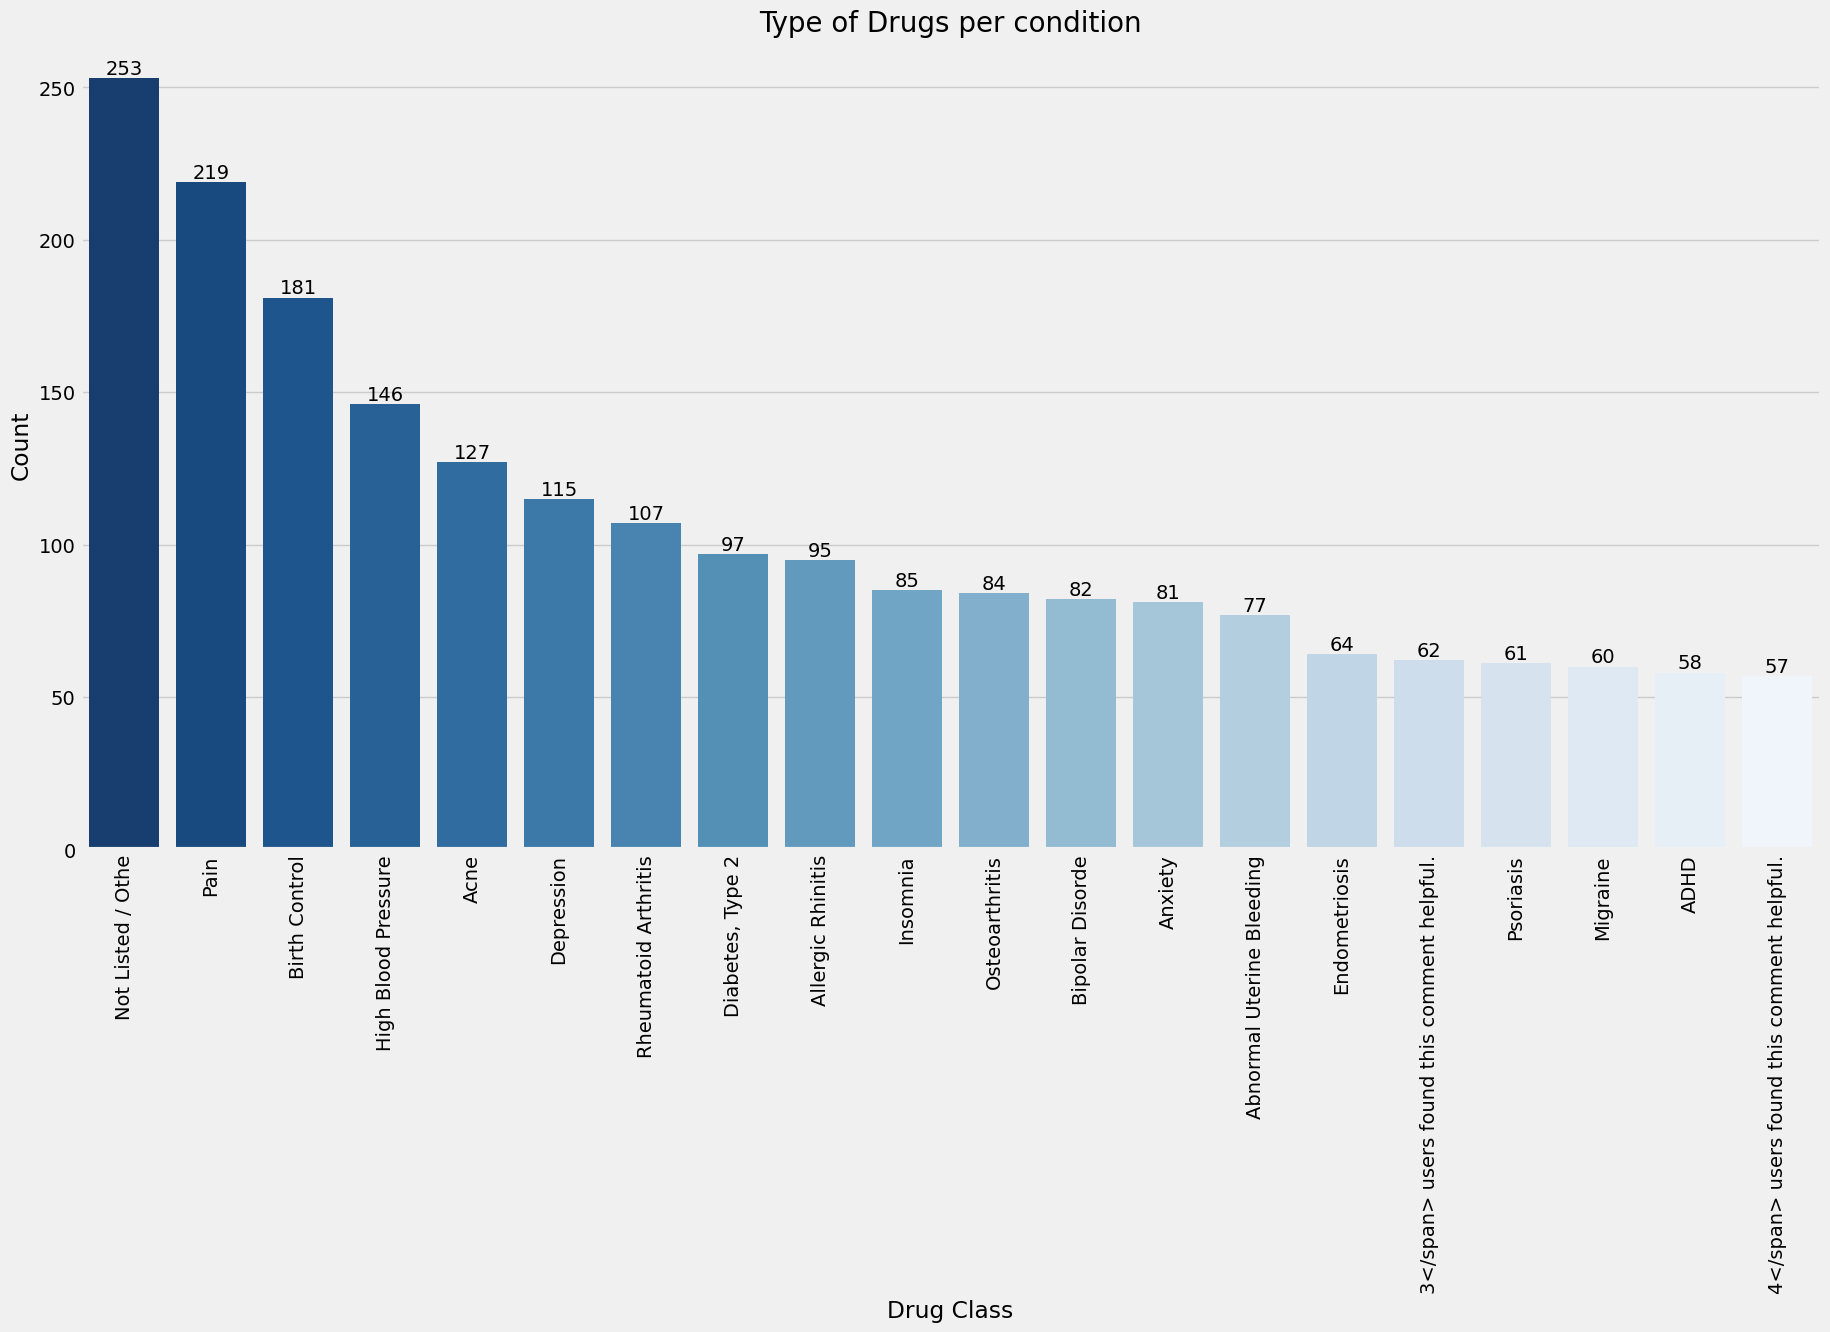

In [24]:
drug_per_cond = df.groupby('condition')['drugName'].nunique().nlargest(20)
drug_per_cond_df = pd.DataFrame({'drug_class':drug_per_cond.index,'counts':drug_per_cond.values})
# How many Medicines per condition (Top 20)
plt.figure(figsize=(20,10))

sns_1 = sns.barplot(data=drug_per_cond_df,x='drug_class',y='counts', palette = 'Blues_r')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_1.set_title('Type of Drugs per condition', fontsize=20)
sns_1.set_xlabel("Drug Class")
sns_1.set_ylabel("Count")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

For Pain there are 219 medicines likewise top 20 conditions with number of medicines are mentioned

## ***Distribution of Rating given by Users***

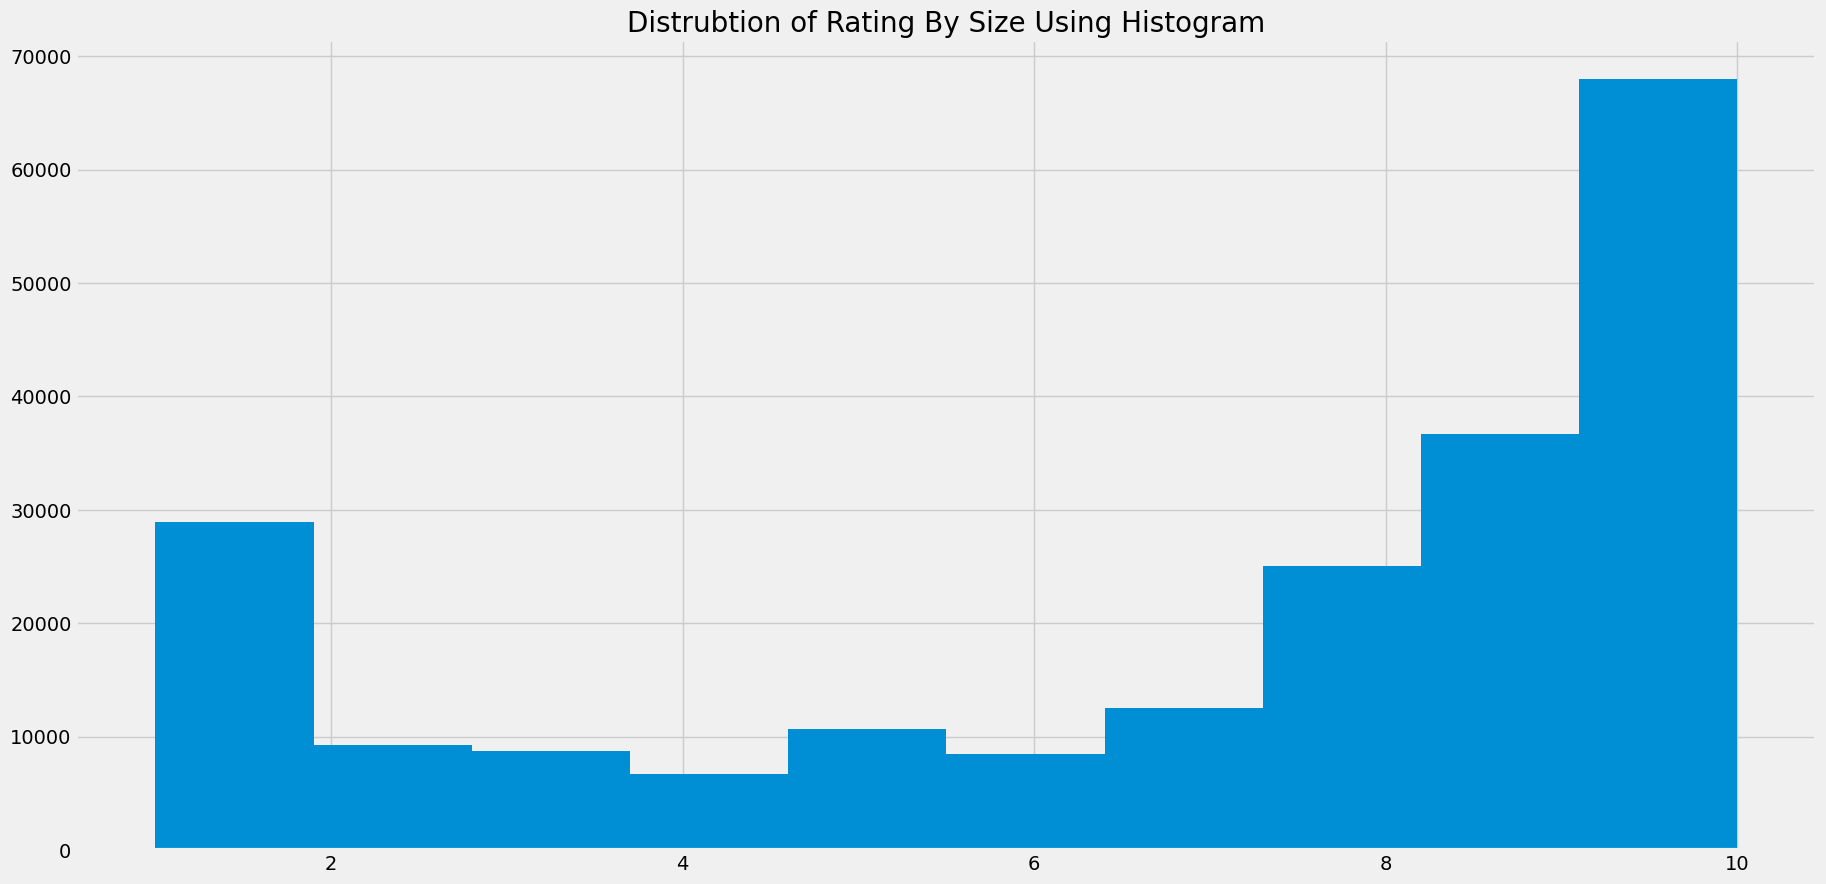

In [25]:
plt.figure(figsize=(20,10))
df['rating'].hist()
plt.title("Distrubtion of Rating By Size Using Histogram", fontsize=20)
plt.show()

Most of the patients ratings are between 8 to 10

## ***Avg rating of Medicines***

In [26]:
# Average Rating of medicines
avg_rating = (df['rating'].groupby(df['drugName']).mean())
avg_rating

drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.414286
Abacavir / lamivudine                   10.000000
Abacavir / lamivudine / zidovudine       9.000000
                                          ...    
ZzzQuil                                  2.000000
depo-subQ provera 104                    5.500000
ella                                     7.183099
femhrt                                   6.500000
pHisoHex                                10.000000
Name: rating, Length: 3671, dtype: float64

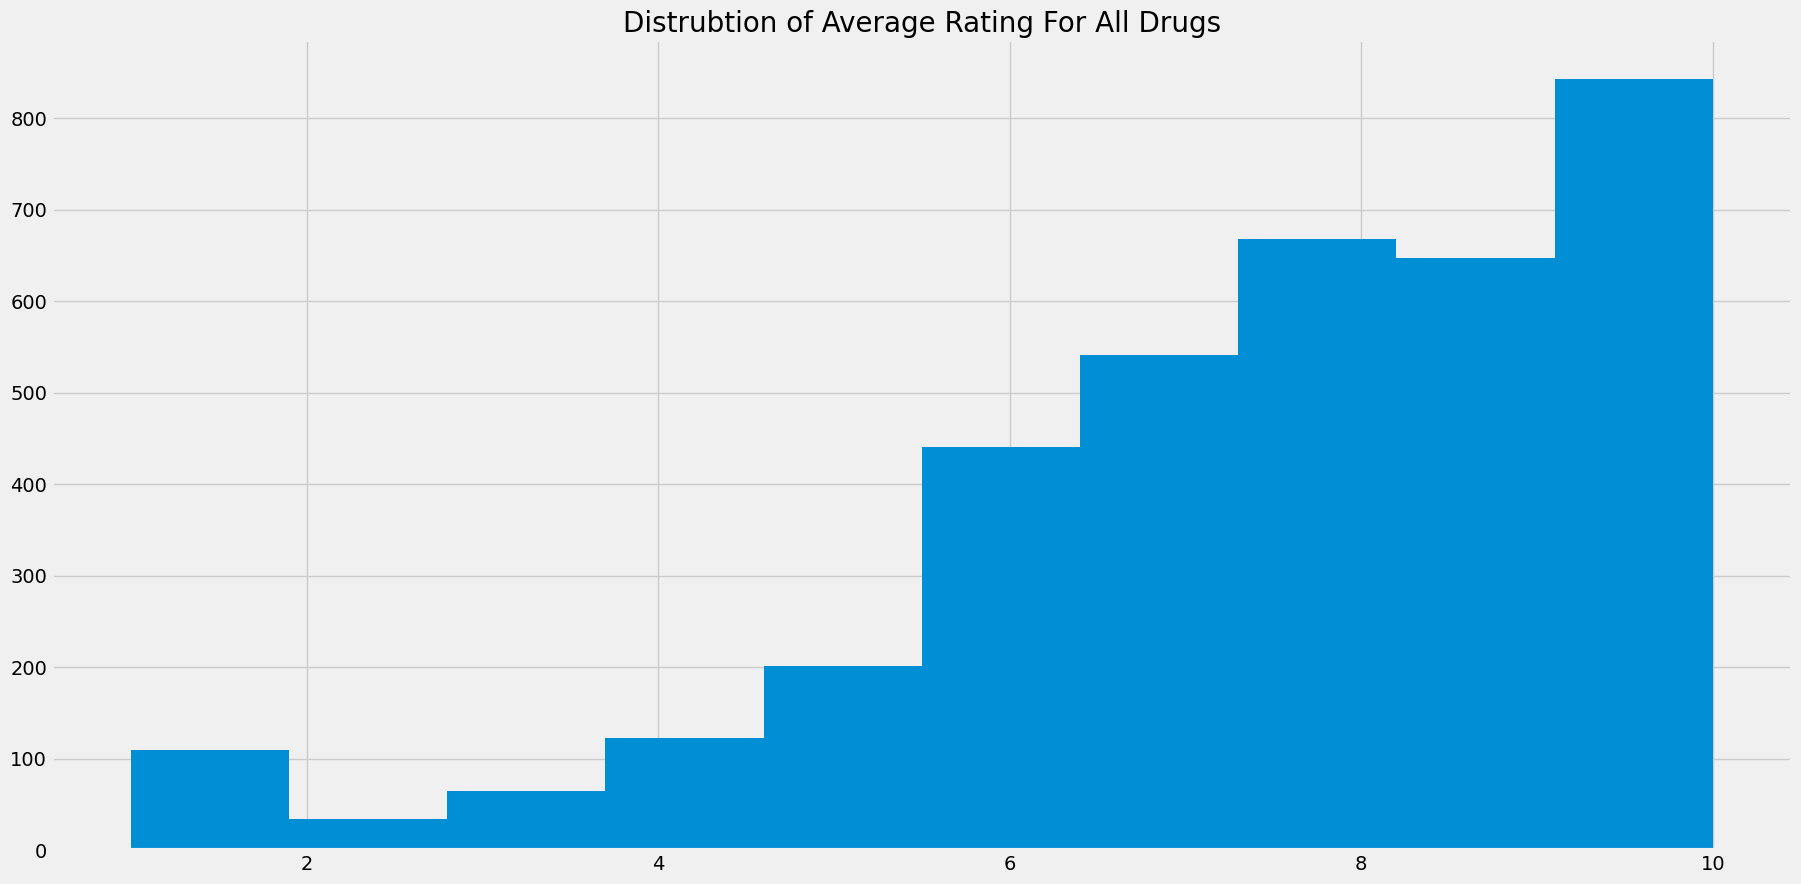

In [27]:
# Average Rating For All Medicines
plt.figure(figsize=(20,10))
avg_rating.hist()
plt.title("Distrubtion of Average Rating For All Drugs", fontsize=20)
plt.show()

The Majority of Rating given by the patients are from 6 to 10

## ***Transforming Date column to get insights out of it***

In [28]:
# converting the date into datetime format
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

# extracting year from date
df['Year'] = df['date'].dt.year

# extracting the month from the date
df['month'] = df['date'].dt.month

# extracting the days from the date
df['day'] = df['date'].dt.day

## ***What are number of Reviews each Year?***

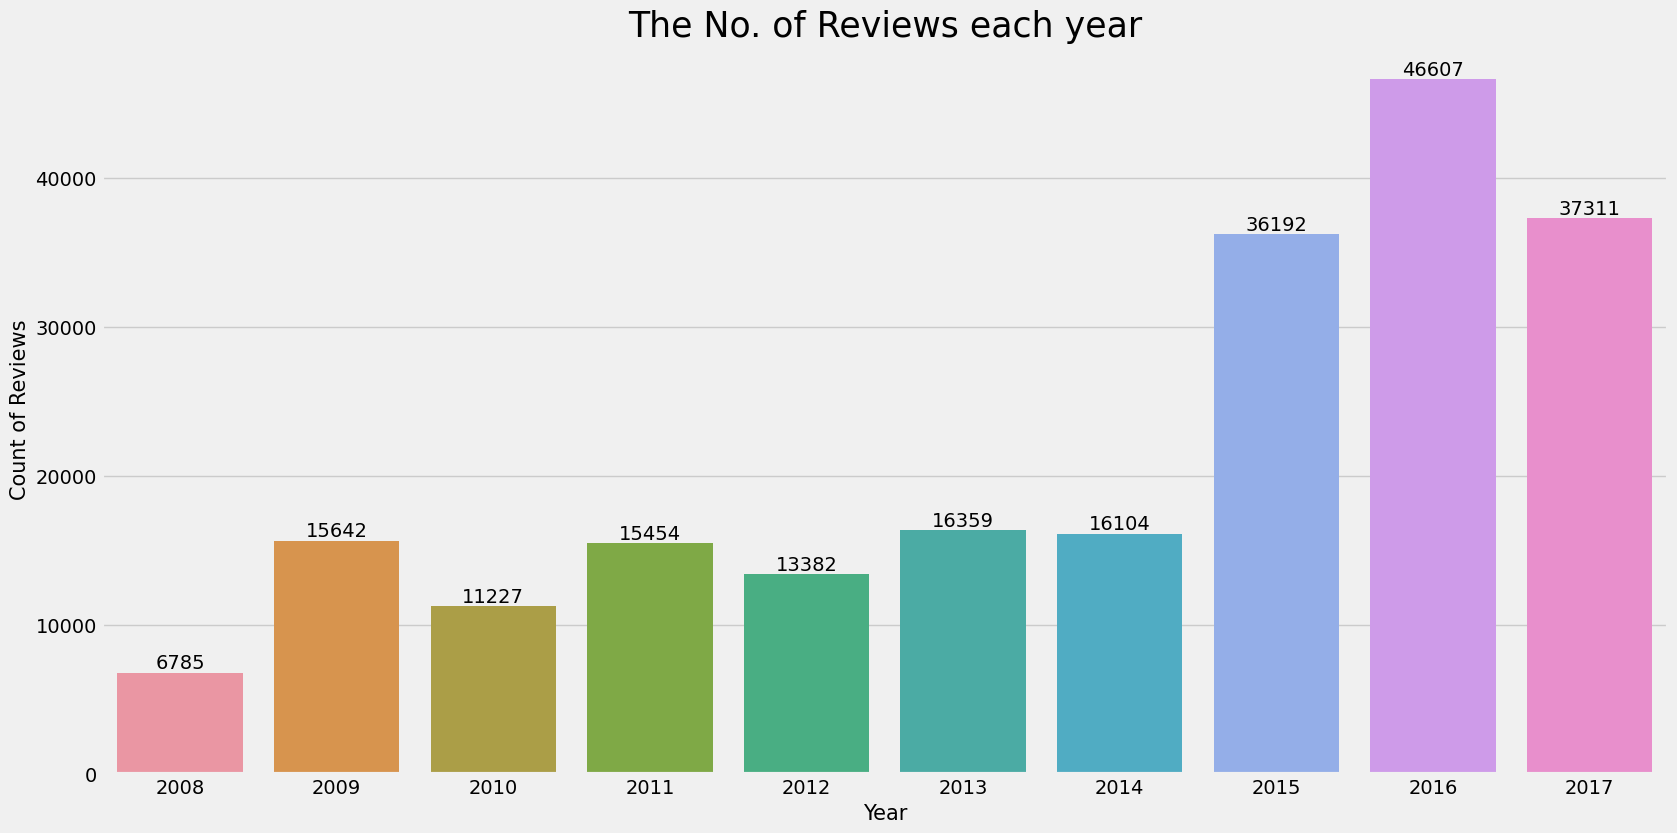

In [29]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18, 9)

df_reset_index = df.reset_index() # reset the index of the DataFrame
sns_=sns.countplot(x='Year', data=df_reset_index)

for i in sns_.containers:
    sns_.bar_label(i,)
    
plt.title('The No. of Reviews each year', fontsize = 25)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

From above plot we can see that Year 2016 had the highest number of reviews followed by Year 2017 and 2015

## ***What are the Number of Reviews each Month?***

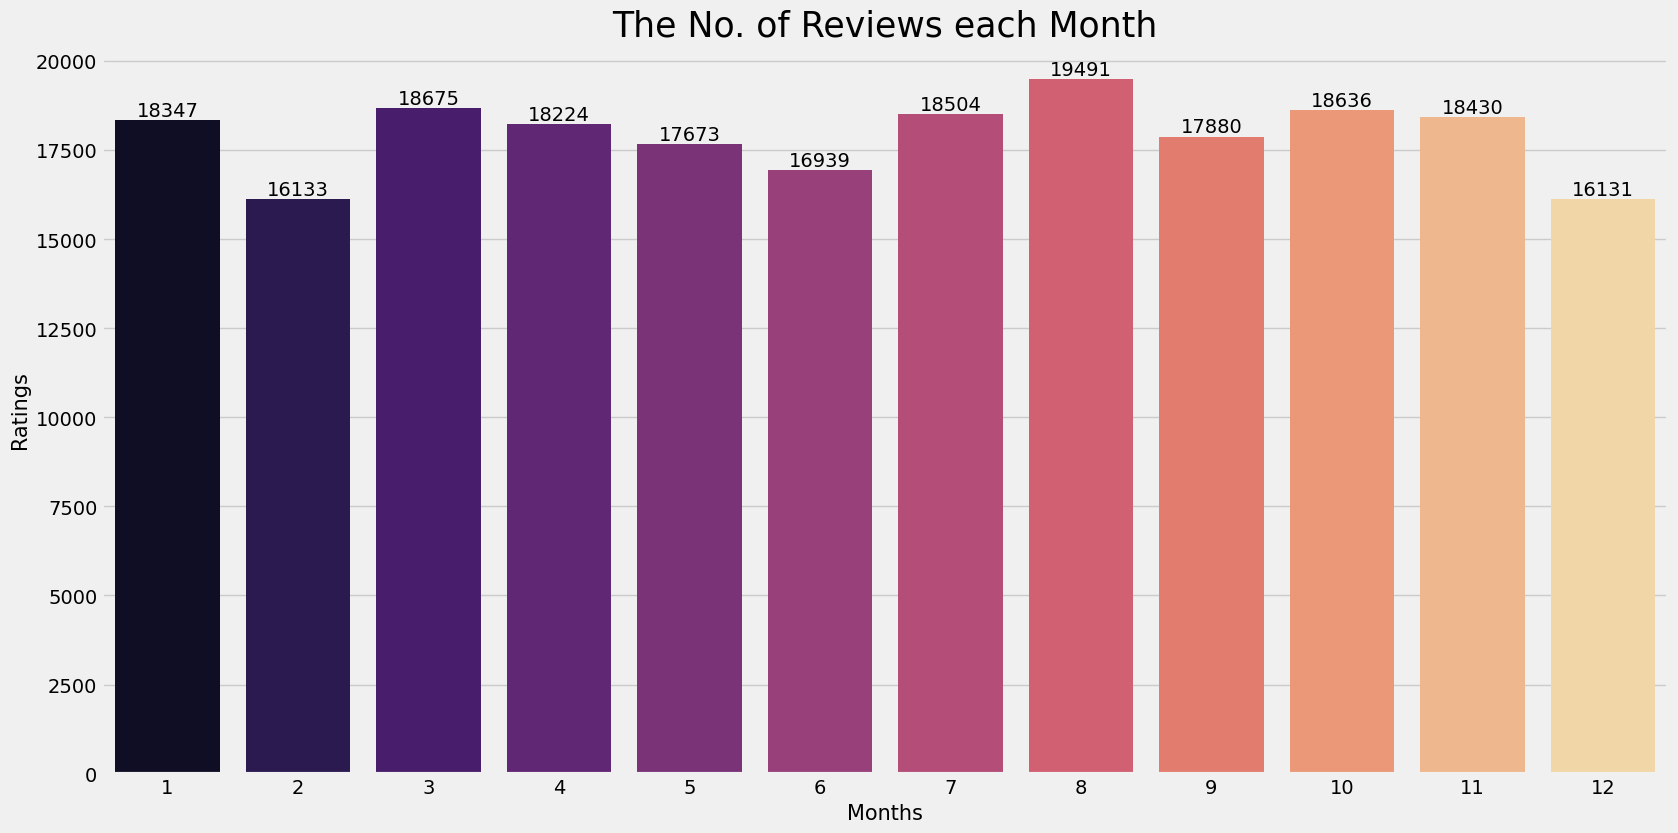

In [30]:
df_reset_index = df.reset_index() # reset the index of the DataFrame
sns_=sns.countplot(x='month', palette ='magma', data=df_reset_index)

for i in sns_.containers:
    sns_.bar_label(i,)

plt.title('The No. of Reviews each Month', fontsize = 25)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

August month has the highest reviews followed by October month.

## ***How genuine is the review? (Using sentiment analysis)***

In [31]:
from textblob import TextBlob
df['review'].head()

0    "It has no side effect, I take it in combinati...
1    "My son is halfway through his fourth week of ...
2    "I used to take another oral contraceptive, wh...
3    "This is my first time using any form of birth...
4    "Suboxone has completely turned my life around...
Name: review, dtype: object

In [32]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [33]:
# Sentiment Score for Review
df['sentiment'] = df['review'].apply(get_sentiment)
# Sentiment Labels for Review
df['sentiment_label'] = df['review'].apply(get_sentiment_label)
df[['review','sentiment','sentiment_label']].head(20)

,review,sentiment,sentiment_label
0,"""It has no side effect, I take it in combinati...",0.000000,neutral
1,"""My son is halfway through his fourth week of ...",0.168333,positive
2,"""I used to take another oral contraceptive, wh...",0.067210,positive
3,"""This is my first time using any form of birth...",0.179545,positive
4,"""Suboxone has completely turned my life around...",0.194444,positive
5,"""2nd day on 5mg started to work with rock hard...",0.003472,positive
6,"""He pulled out, but he cummed a bit in me. I t...",0.111111,positive
7,"""Abilify changed my life. There is hope. I was...",0.074107,positive
8,""" I Ve had nothing but problems with the Kepp...",0.200000,positive
9,"""I had been on the pill for many years. When m...",0.079167,positive


## ***How many positive and negative and neutral reviews?***

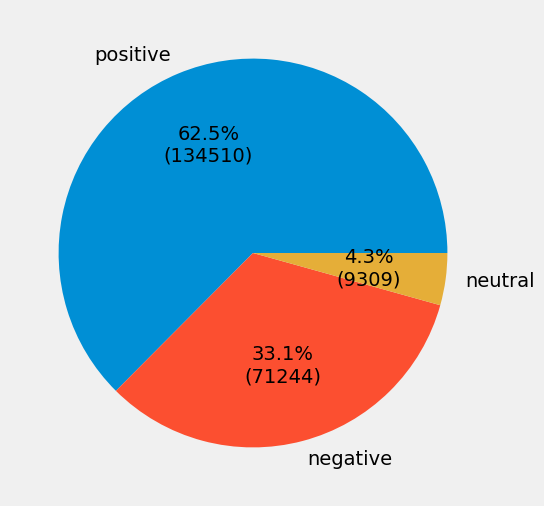

In [34]:
plt.figure(figsize=(12,6))

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = df['sentiment_label'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.show()

We can see that Majority of reviews given by users are Positive(62.5%) and Negative(33.1%), while Neutral reviews are (4.3%)

## ***What is Correlation Between sentiment and rating?***

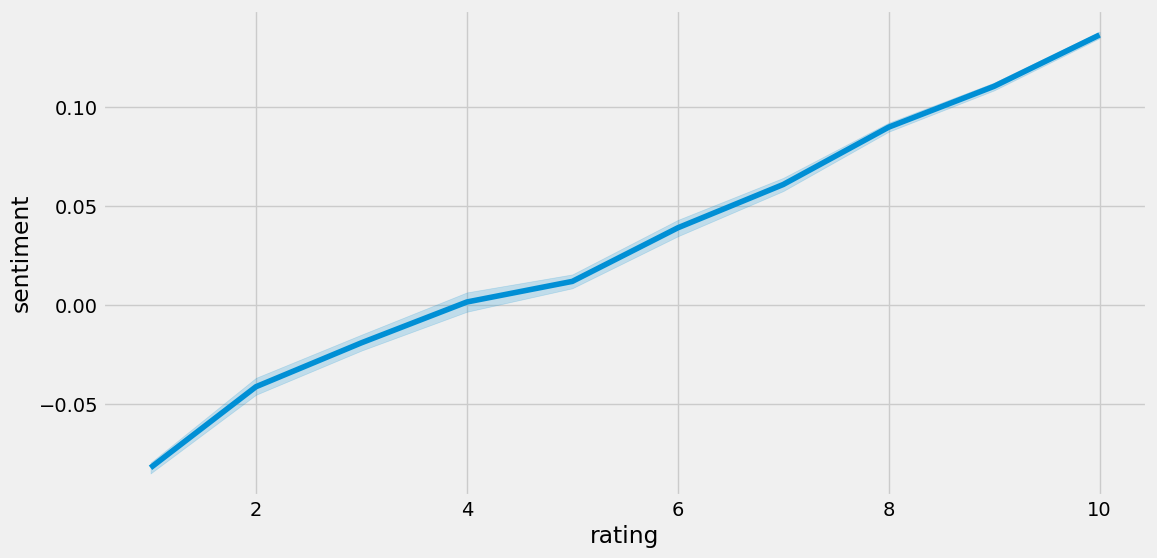

In [35]:
# Correlation Between Our sentiment and rating
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='rating',y='sentiment')
plt.show()

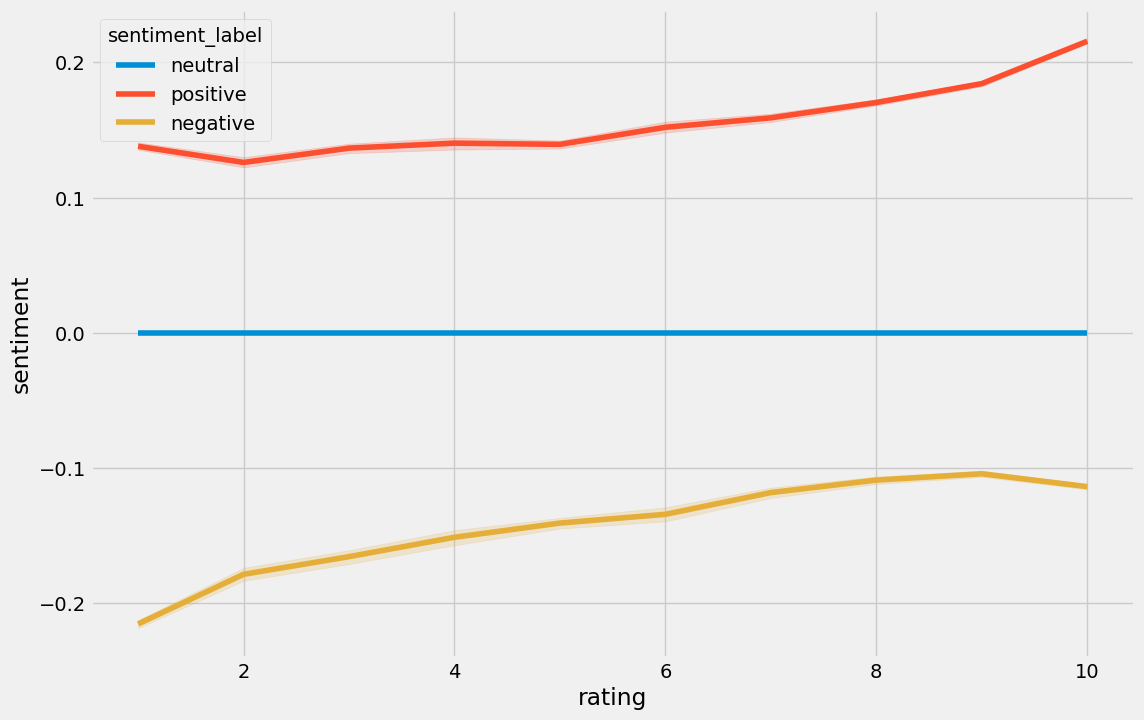

In [36]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df,x='rating',y='sentiment',hue='sentiment_label')
plt.show()

The positive Ratings are increasing gradually which indicates that the patients are getting better by the use of the prescribed Medicines

The Negative Ratings are decreasing which is a good sign that the Drugs given to patients are effective

## ***How many reviews are genuine as compared to the rating?***

Genuine good rating =positive + rating 10-6

Genuine bad rating = negative + rating 4-1

In [37]:
# Genuine Good Rating Per Review
good_review =  len(df[(df['rating'] >= 6) & (df['sentiment_label'] == 'positive')])
print('According to Sentiment and Rating the number of Good Ratings are -', good_review)

According to Sentiment and Rating the number of Good Ratings are - 107889


In [38]:
# Genuine Bad Rating Per Review
bad_review = len(df[(df['rating'] <= 4) & (df['sentiment_label'] == 'negative')])
print('According to Sentiment and Rating the number of Good Ratings are -', bad_review)

According to Sentiment and Rating the number of Good Ratings are - 29507


## ***Top Medicines name Per UsefulCount***

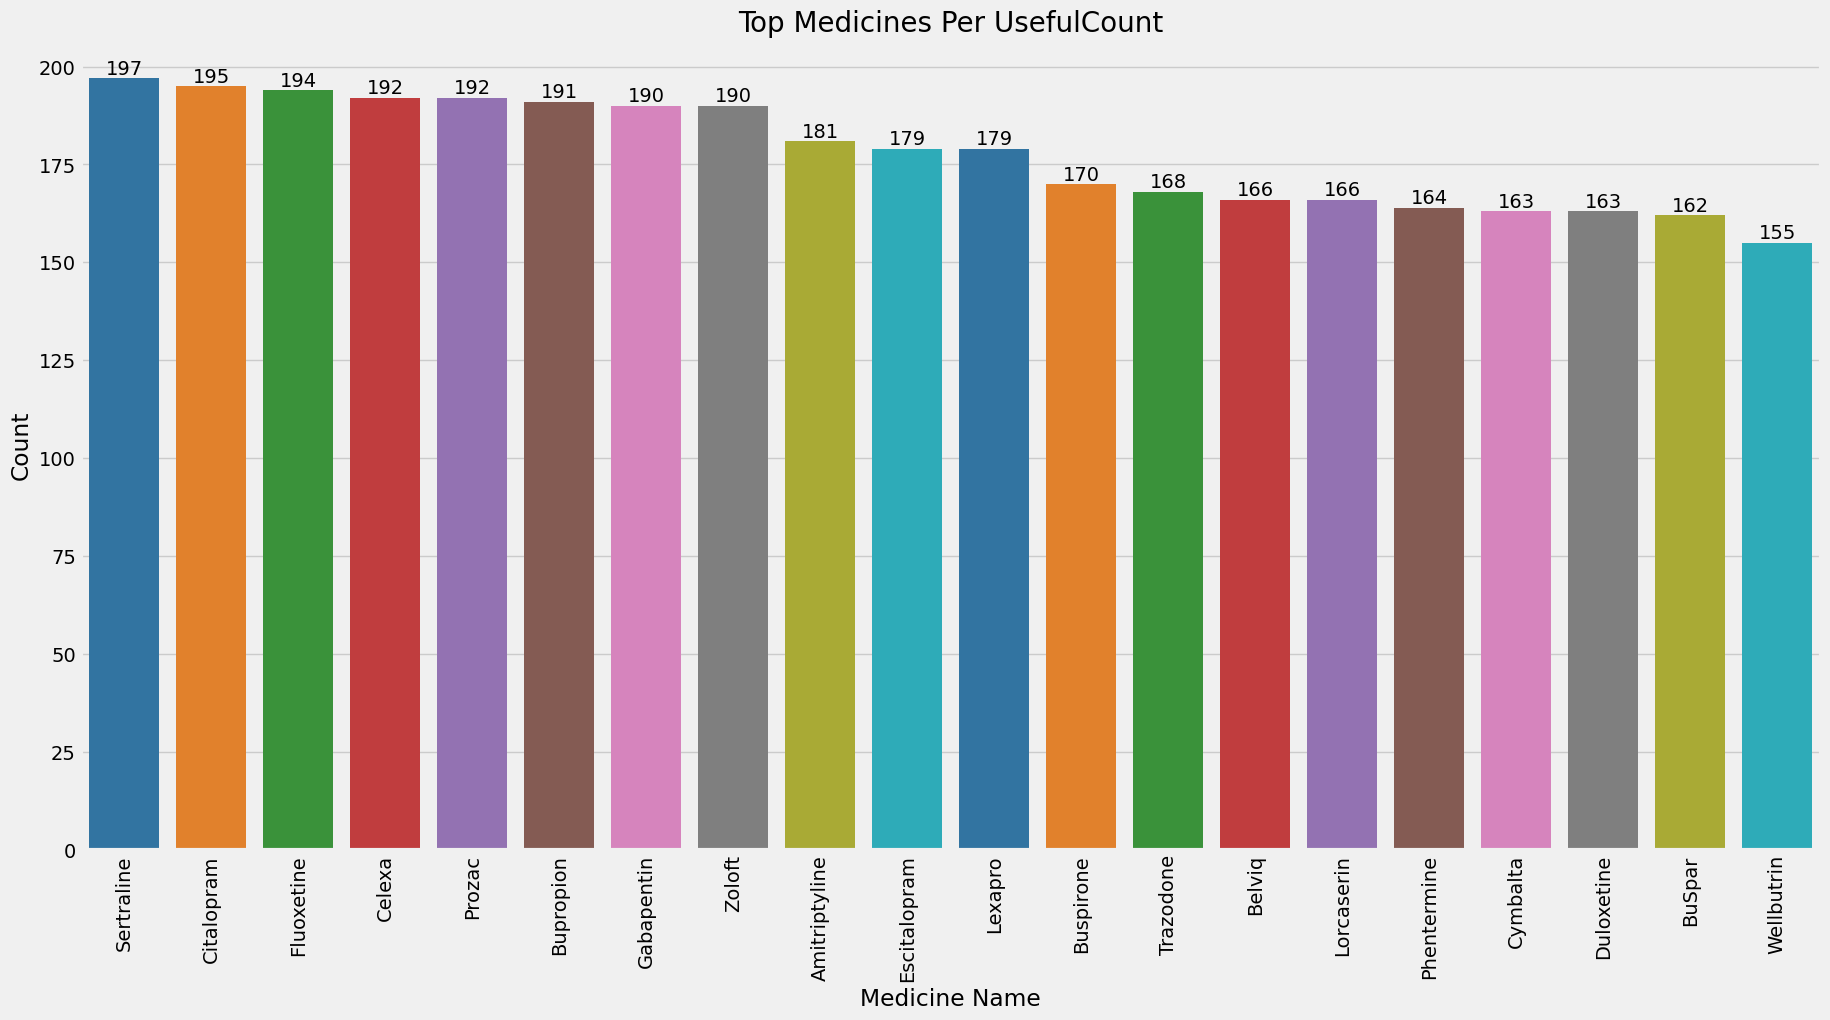

In [39]:
drug_usefulcount = df.groupby('drugName')['usefulCount'].nunique().nlargest(20)
drug_usefulcount_df = pd.DataFrame({'drug_name':drug_usefulcount.index,'counts':drug_usefulcount.values})
plt.figure(figsize=(20,10))

sns_1 = sns.barplot(data=drug_usefulcount_df,x='drug_name',y='counts', palette = 'tab10')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_1.set_title('Top Medicines Per UsefulCount', fontsize=20)
sns_1.set_xlabel("Medicine Name")
sns_1.set_ylabel("Count")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

Sertraline, Citalopram and Fluoxetine are the Drugs which are most useful for treating people

<Axes: xlabel='rating', ylabel='usefulCount'>

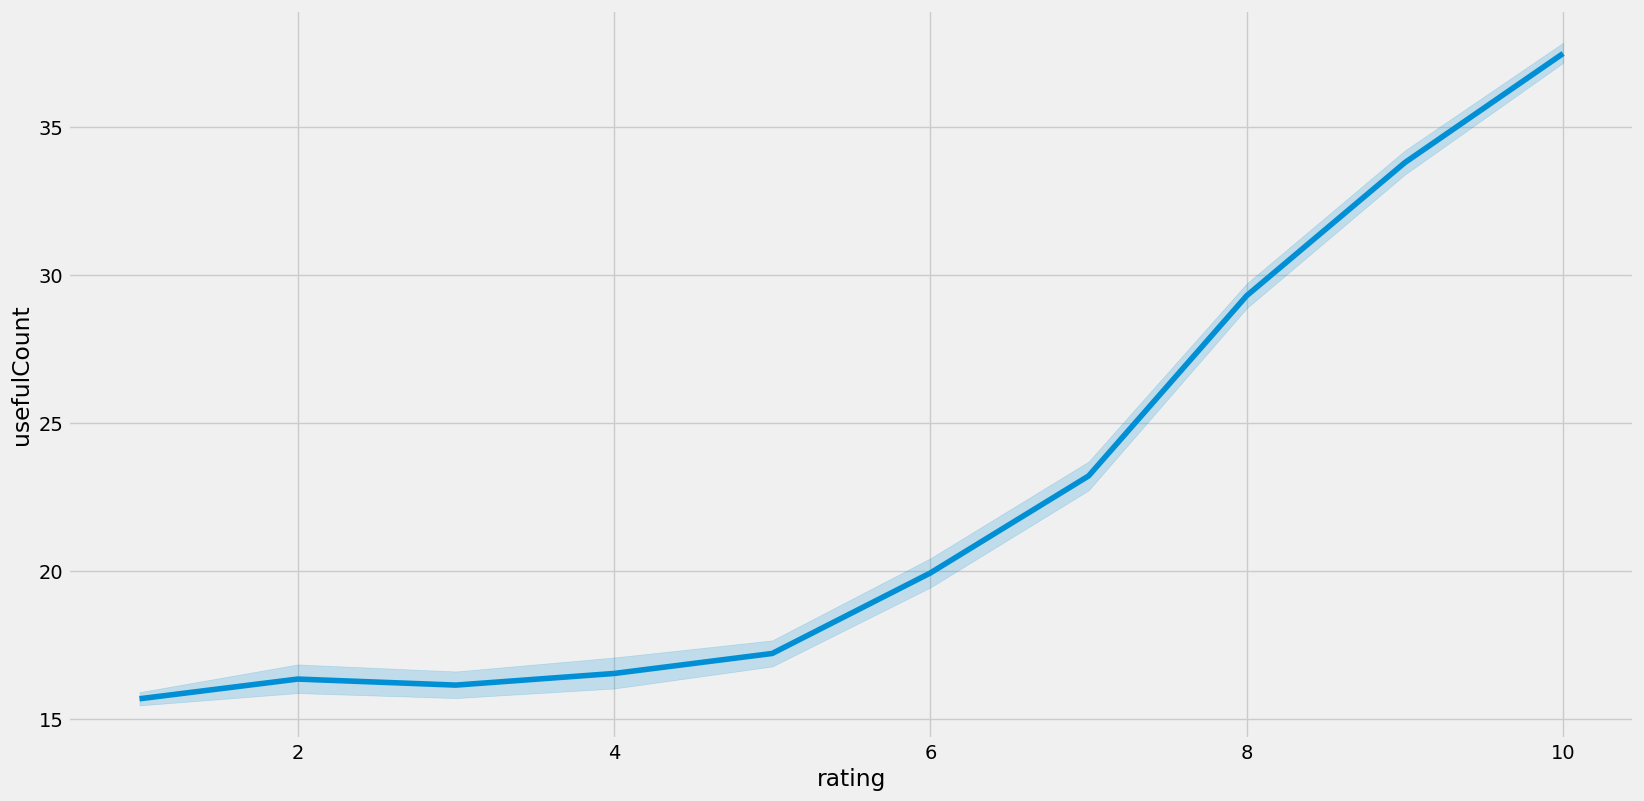

In [40]:
# Correlation between Rating and Usefulcount
sns.lineplot(data=df,x='rating',y='usefulCount')

As usefulcount increases rating increases

# Feature Engineering/ Data Preprocessing

In [41]:
# let's make a new column named "review sentiment"

df.loc[(df['rating'] >= 5), 'Review_Sentiment'] = 1
df.loc[(df['rating'] < 5), 'Review_Sentiment'] = 0

df['Review_Sentiment'].value_counts()

1.0    161491
0.0     53572
Name: Review_Sentiment, dtype: int64

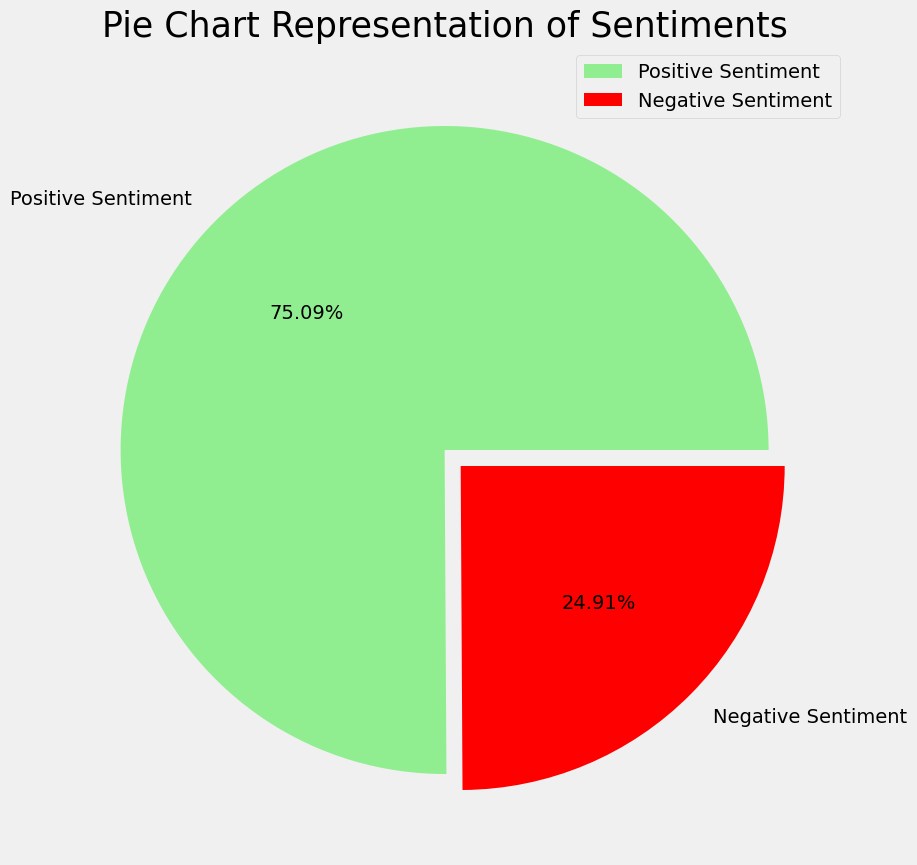

In [42]:
size = [161491, 53572]
colors = ['lightgreen', 'red']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.07]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

In [43]:
# changing to lower case
lower = df.review.str.lower()

# Replacing the repeating pattern of &#039;
pattern_remove = lower.str.replace("&#039;", "")

# Removing all the special Characters
special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

# Removing all the non ASCII characters
ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

# Removing the leading and trailing Whitespaces
whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

# Replacing multiple Spaces with Single Space
multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

# Replacing Two or more dots with one
df['review_clean'] = multiw_remove.str.replace(r'\.{2,}', ' ')

In [44]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

In [45]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
df['review_clean'] = df['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))
df.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Year,month,day,sentiment,sentiment_label,Review_Sentiment,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,0.000000,neutral,1.0,it has no side effect i take it in combin of b...
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,0.168333,positive,1.0,my son is halfway through his fourth week of i...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,0.067210,positive,1.0,i use to take anoth oral contracept which had ...


Stemming is mainly used to reduce the dimensionality of data. In simple words, if there we have words like use, uses, used, using that are different but similar contextually. We bring these words to base word 'use' by removing suffixes from all the words.

In [46]:
# Removing the stopwords 
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['review_clean'] = df['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,uniqueID,drugName,condition,review,rating,date,usefulCount,Year,month,day,sentiment,sentiment_label,Review_Sentiment,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,0.000000,neutral,1.0,side effect take combin bystol 5 mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,0.168333,positive,1.0,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,0.067210,positive,1.0,use take anoth oral contracept 21 pill cycl ve...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2015,11,3,0.179545,positive,1.0,first time use ani form birth control im glad ...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,0.194444,positive,1.0,suboxon complet turn life around feel healthie...


Stopwords are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text. Examples of a few stop words in English are “the”, “a”, “an”, “has”, “what”,"it".

In [47]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

df['sentiment'] = sentiment(df['review'])
df['sentiment_clean'] = sentiment(df['review_clean'])

Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e., it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.

In [48]:
# changing to lower case
lower = df.review.str.lower()

# Replacing the repeating pattern of &#039;
pattern_remove = lower.str.replace("&#039;", "")

# Removing all the special Characters
special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

# Removing all the non ASCII characters
ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

# Removing the leading and trailing Whitespaces
whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

# Replacing multiple Spaces with Single Space
multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

# Replacing Two or more dots with one
df['review_clean_ss'] = multiw_remove.str.replace(r'\.{2,}', ' ')

In [49]:
df['sentiment_clean_ss'] = sentiment(df['review_clean_ss'])

In [50]:
df = df.dropna(how="any", axis=0)

#Word count in each review
df['count_word']=df["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
df['count_unique_word']=df["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
df["count_punctuations"] = df["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df["count_words_title"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
df["mean_word_len"] = df["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Feature Selection

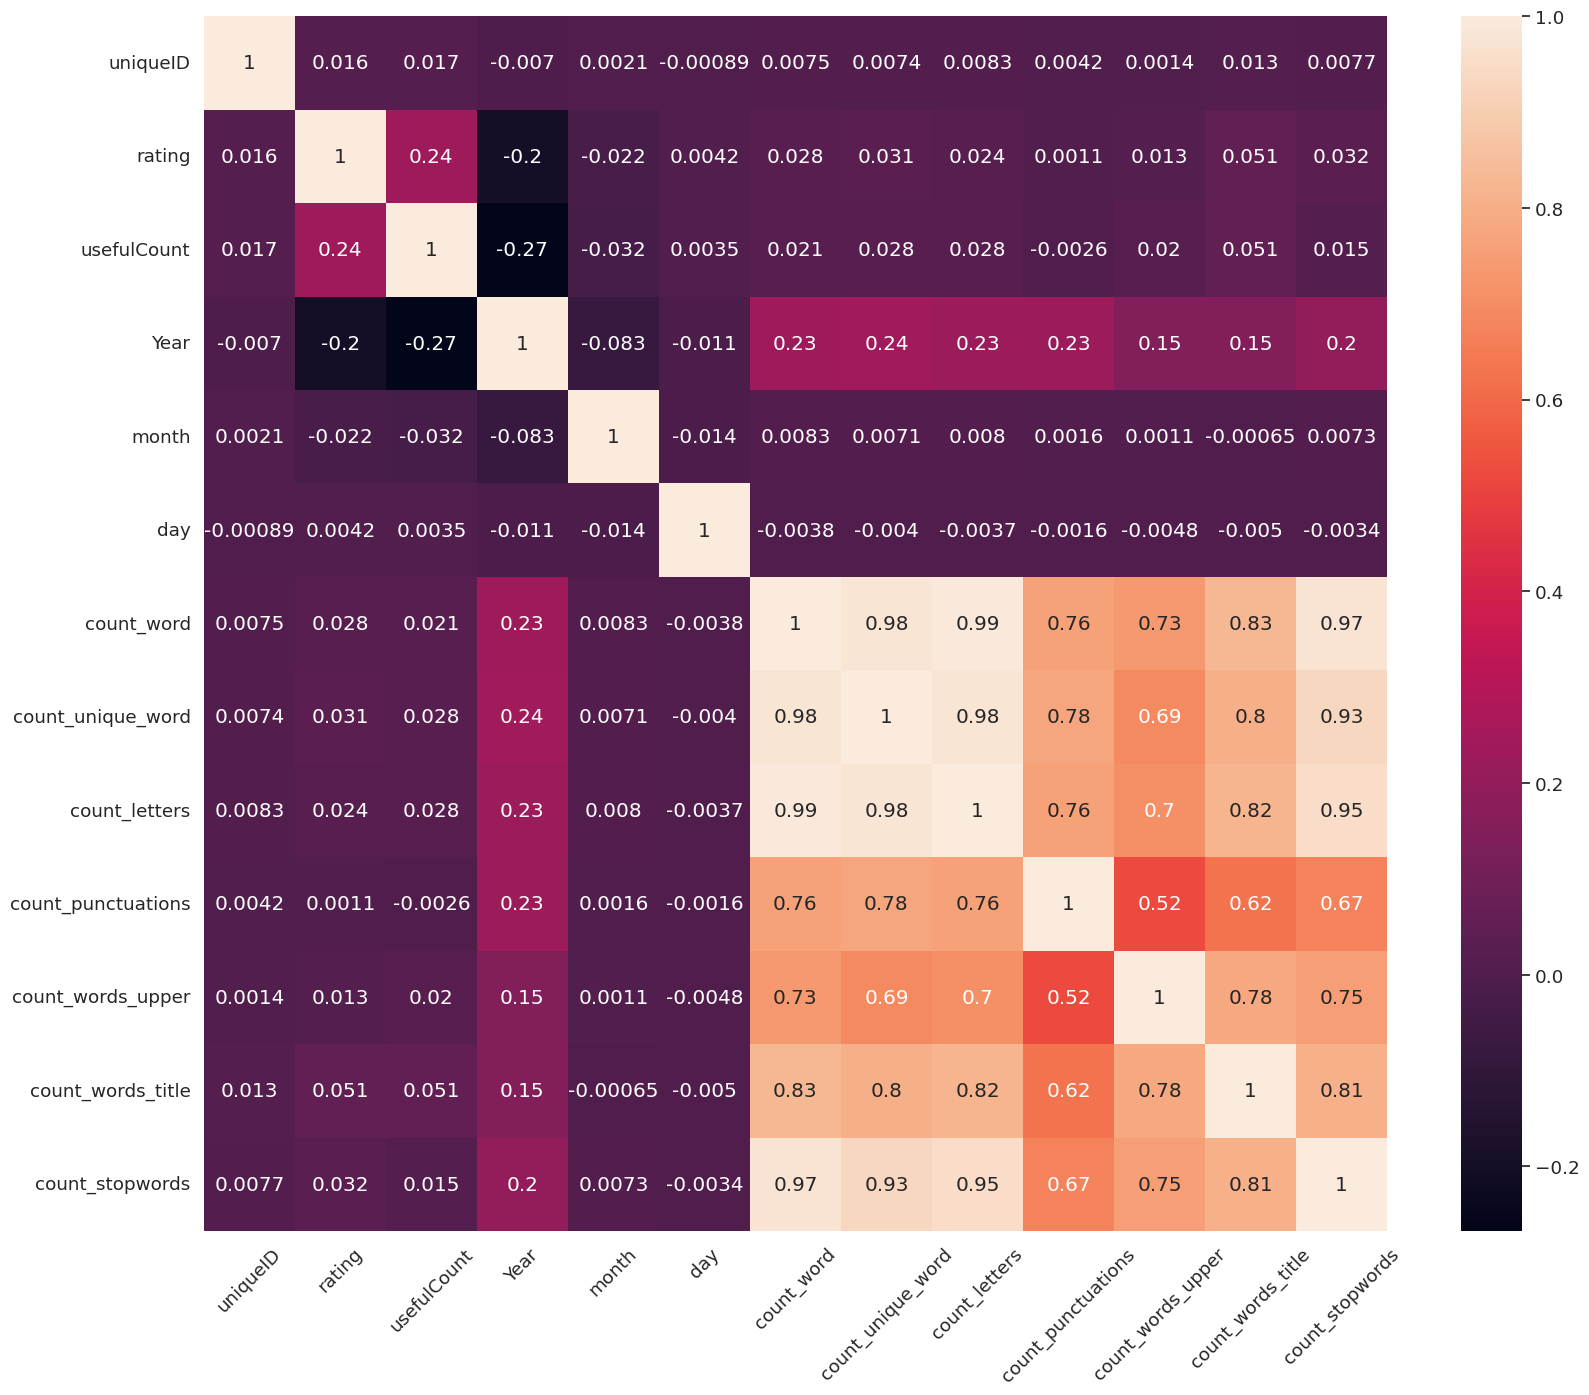

In [51]:
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = df.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True)
plt.setp(sns_.get_xticklabels(), rotation = 45)
plt.show()

## **Label Encoding**

In [52]:
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

To handle categorical variables we use Label Encoding

### **After Label Encoding**

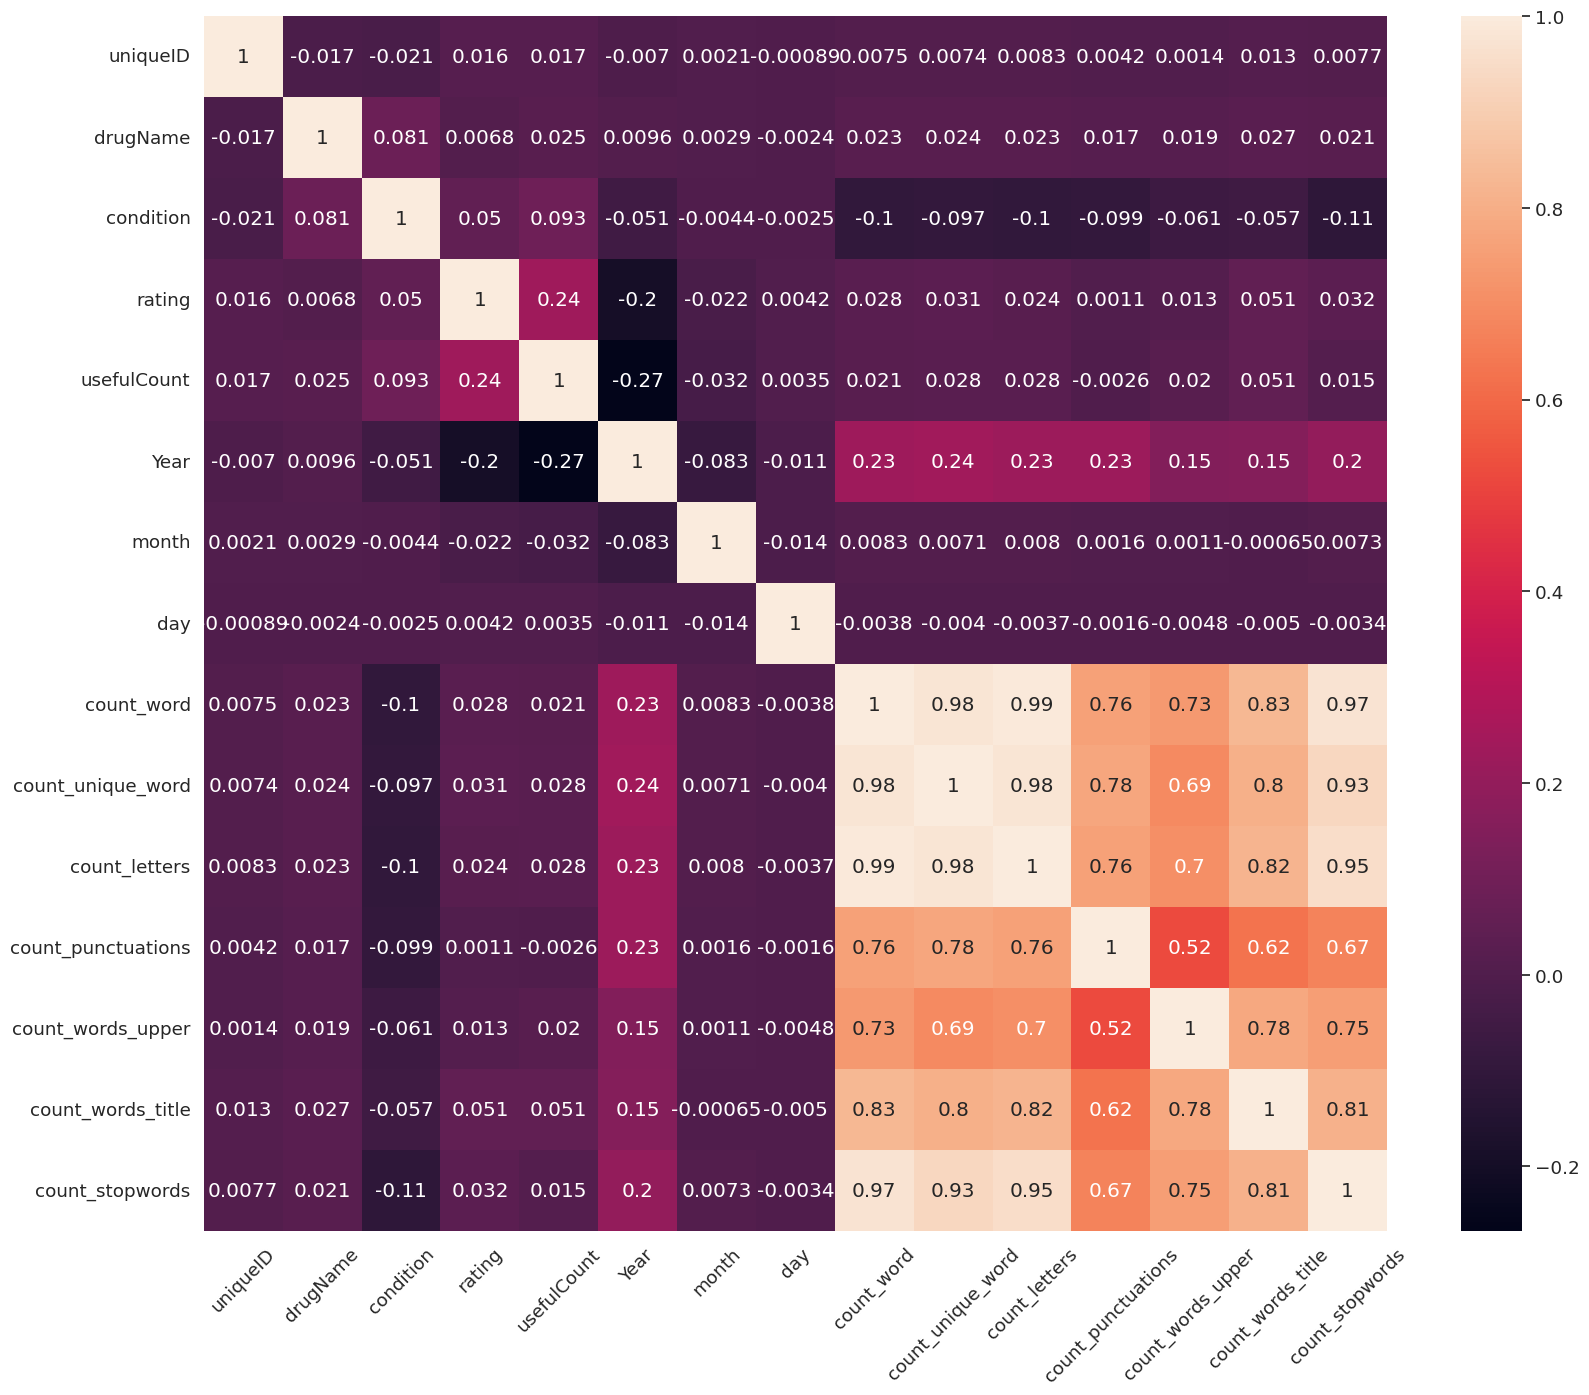

In [53]:
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = df.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True)
plt.setp(sns_.get_xticklabels(), rotation = 45)
plt.show()

# **Model Training**

In [54]:
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split


## **Train-Test split**

In [55]:
features = df[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = df['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (160401, 15)
The Test set size  (53468, 15)


In [56]:
#LGBM Light Gradient Boosting Machine 
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.9106755442507668
The confusion Matrix is 


array([[10130,  3256],
       [ 1520, 38562]])

Why LGBM Algorithm?

The size of data is increasing day by day and it is becoming difficult for traditional data science algorithms to give faster results. 

Light GBM is prefixed as ‘Light’ because of its high speed. 

Light GBM can handle the large size of data and takes lower memory to run. Another reason of why Light GBM is popular is because it focuses on accuracy of results. 

LGBM also supports GPU learning and thus data scientists are widely using LGBM for data science application development.

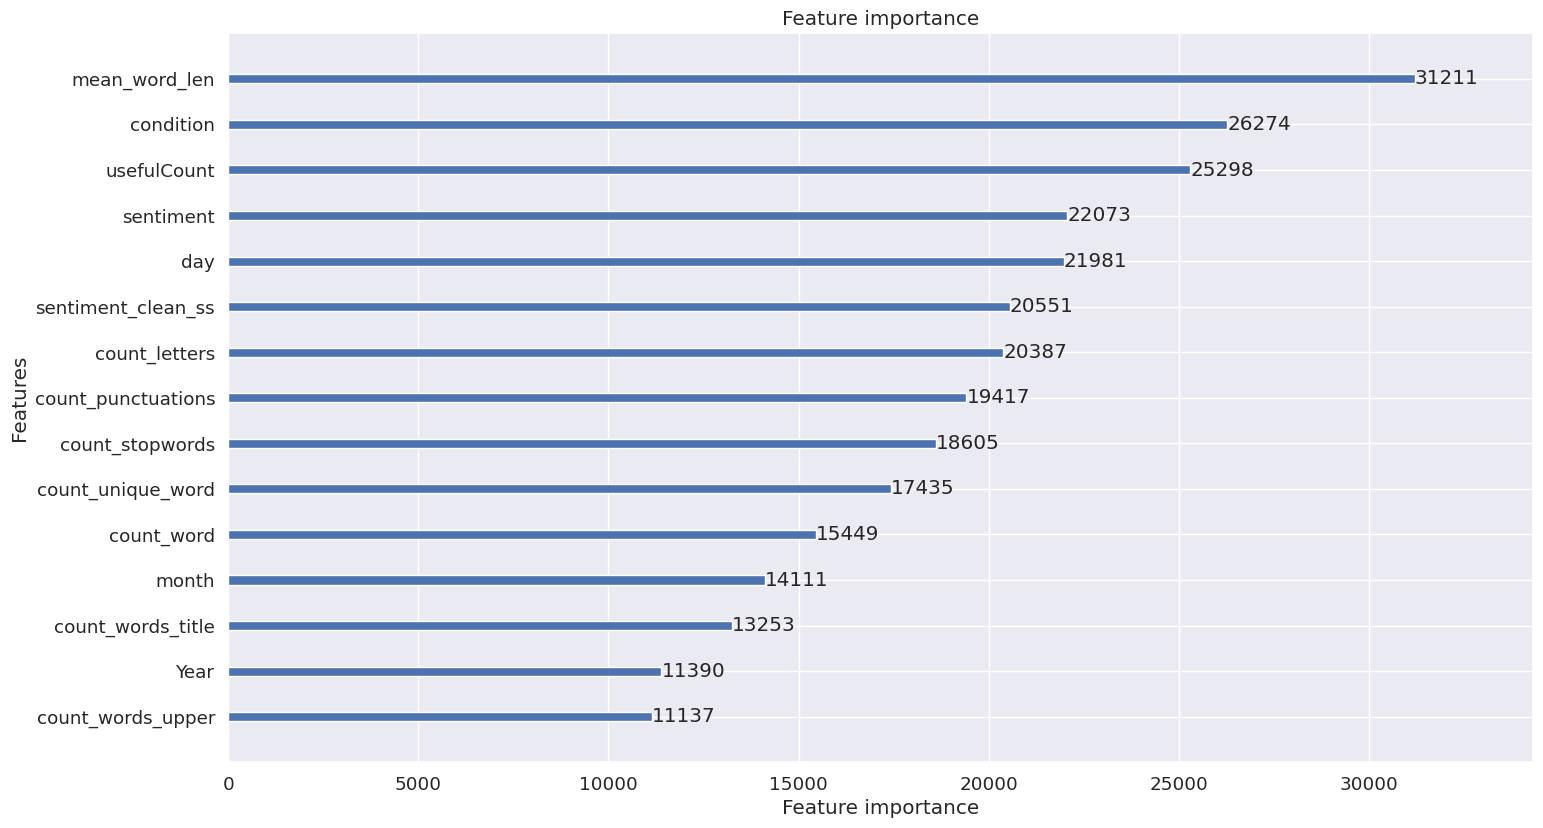

In [57]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [15, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model)
plt.show()

Condition, Useful count and sentiment these factors have large effect for model prediction